# Cov IT - Documentation de l'analyse de donnée

**Contexte** : Dans le cadre du groupe Analyse IT nous avons pour mission de transformer les csv suivant :

```country_wise_latest.csv``` 
```covid_19_clean_complete.csv``` 
```day_wise.csv``` 
```full_grouped.csv``` 
```usa_county_wise.csv``` 
```worldometer_coronavirus_daily_data.csv``` 
```worldometer_coronavirus_summary_data.csv``` 
```worldometer_data.csv``` 

In [1]:
# Importation des librairies necessaire au traitement des données.

In [ ]:
# pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas as pd
import numpy as np

In [49]:
# Configuration du style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

-------------------------------------------------------------------------------------------------------------

In [50]:
# Création d'une liste avec tous les csv
csv_files = [
    'country_wise_latest.csv',
    'covid_19_clean_complete.csv',
    'full_grouped.csv',
    'usa_county_wise.csv',
    'worldometer_coronavirus_daily_data.csv',
    'worldometer_coronavirus_summary_data.csv',
    'worldometer_data.csv'
]

In [51]:
dataframes = {} # Creation d'un dictionnaire pour stocker tous les dataframes

In [52]:
# Boucle importer chaque fichier CSV et créez des DataFrames individuels
for file in csv_files:
    # Créez le nom du DataFrame en supprimant '.csv'
    df_name = file.replace('.csv', '')
    # Créez le DataFrame en tant que variable en utilisant exec()
    exec(f"{df_name} = pd.read_csv('{file}')")
    # Afficher le DataFrame
    exec(f"display({df_name})")


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627915,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",7/27/20,347,1
627916,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",7/27/20,70,0
627917,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",7/27/20,2781,23
627918,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",7/27/20,142,0


,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-2-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-2-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-2-19,Afghanistan,0.0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...
184782,2022-5-10,Zimbabwe,248642.0,106.0,963.0,5481.0,2.0
184783,2022-5-11,Zimbabwe,248778.0,136.0,1039.0,5481.0,0.0
184784,2022-5-12,Zimbabwe,248943.0,165.0,1158.0,5481.0,0.0
184785,2022-5-13,Zimbabwe,249131.0,188.0,1283.0,5482.0,1.0


,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495
4,Angola,Africa,99194,1900.0,97149.0,145.0,NaN,2853,55.0,1499795.0,43136.0,34769277
...,...,...,...,...,...,...,...,...,...,...,...,...
221,Wallis And Futuna Islands,Australia/Oceania,454,7.0,438.0,9.0,NaN,41755,644.0,20508.0,1886140.0,10873
222,Western Sahara,Africa,10,1.0,9.0,0.0,NaN,16,2.0,NaN,NaN,624681
223,Yemen,Asia,11819,2149.0,9009.0,661.0,23.0,381,69.0,265253.0,8543.0,31049015
224,Zambia,Africa,320591,3983.0,315997.0,611.0,NaN,16575,206.0,3452554.0,178497.0,19342381


,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


## Visualisation et analyse

In [14]:
# 1. Analyse des valeurs manquantes
def visualize_missing_data(dataframes):
    for file_name, df in dataframes.items():
        plt.figure(figsize=(12, 6))
        print(f"\nAnalyse des valeurs manquantes pour {file_name}")
        
        # Matrice des valeurs manquantes
        msno.matrix(df)
        plt.title(f'Distribution des valeurs manquantes dans {file_name}')
        plt.show()
        
        # Heatmap des valeurs manquantes
        plt.figure(figsize=(10, 8))
        msno.heatmap(df)
        plt.title(f'Corrélation des valeurs manquantes dans {file_name}')
        plt.show()

In [15]:
# 2. Analyse des distributions et valeurs aberrantes
def analyze_distributions(df):
    # Distribution des cas par région WHO
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df, x='WHO Region', y='Confirmed')
    plt.xticks(rotation=45)
    plt.title('Distribution des cas confirmés par région WHO')
    plt.yscale('log')
    plt.show()

    # Corrélation entre les variables numériques
    numeric_cols = ['Confirmed', 'Deaths', 'Recovered', 'Active']
    plt.figure(figsize=(10, 8))
    correlation = df[numeric_cols].corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Corrélation entre les variables')
    plt.show()

In [16]:
# 3. Analyse temporelle
def analyze_time_series(df):
    plt.figure(figsize=(15, 8))
    df_grouped = df.groupby('Date').agg({
        'Confirmed': 'sum',
        'Deaths': 'sum',
        'Recovered': 'sum',
        'Active': 'sum'
    })
    
    for col in ['Confirmed', 'Deaths', 'Recovered', 'Active']:
        plt.plot(df_grouped.index, df_grouped[col], label=col)
    
    plt.title('Évolution temporelle des indicateurs COVID')
    plt.xlabel('Date')
    plt.ylabel('Nombre de cas')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

In [17]:
# 4. Analyse des ratios
def analyze_ratios(df):
    df['Mortality_Rate'] = (df['Deaths'] / df['Confirmed'] * 100).replace([np.inf, -np.inf], np.nan)
    df['Recovery_Rate'] = (df['Recovered'] / df['Confirmed'] * 100).replace([np.inf, -np.inf], np.nan)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    sns.histplot(data=df, x='Mortality_Rate', bins=50, ax=ax1)
    ax1.set_title('Distribution du taux de mortalité')
    
    sns.histplot(data=df, x='Recovery_Rate', bins=50, ax=ax2)
    ax2.set_title('Distribution du taux de guérison')
    
    plt.tight_layout()
    plt.show()

In [24]:
dataframes = {
    'country_wise_latest': country_wise_latest,
    'covid_19_clean_complete': covid_19_clean_complete,
    'full_grouped': full_grouped,
    'usa_county_wise': usa_county_wise,
    'worldometer_coronavirus_daily_data': worldometer_coronavirus_daily_data,
    'worldometer_coronavirus_summary_data': worldometer_coronavirus_summary_data,
    'worldometer_data': worldometer_data
}


=== Analyse des valeurs manquantes ===

Analyse des valeurs manquantes pour country_wise_latest


<Figure size 1200x600 with 0 Axes>

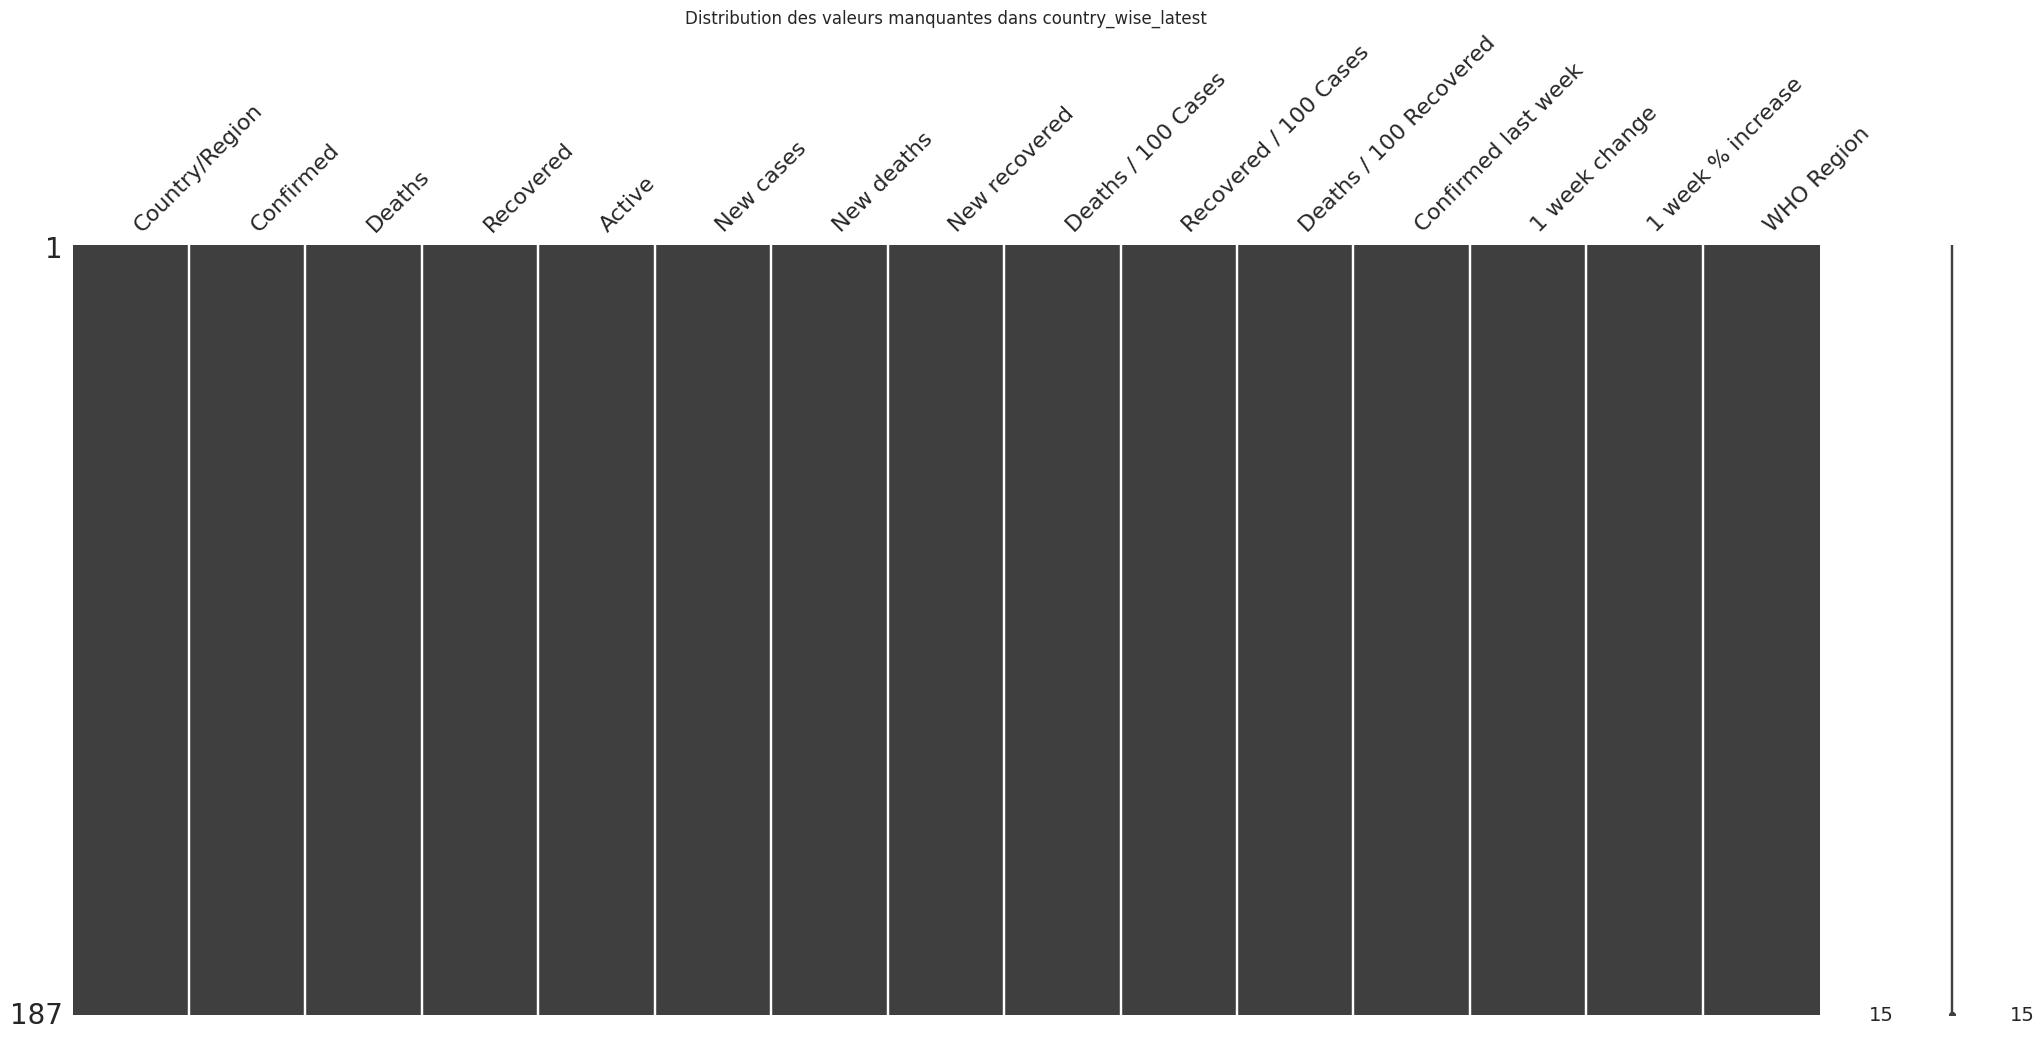

/home/dvivant/myenv/lib/python3.12/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/dvivant/myenv/lib/python3.12/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Figure size 1000x800 with 0 Axes>

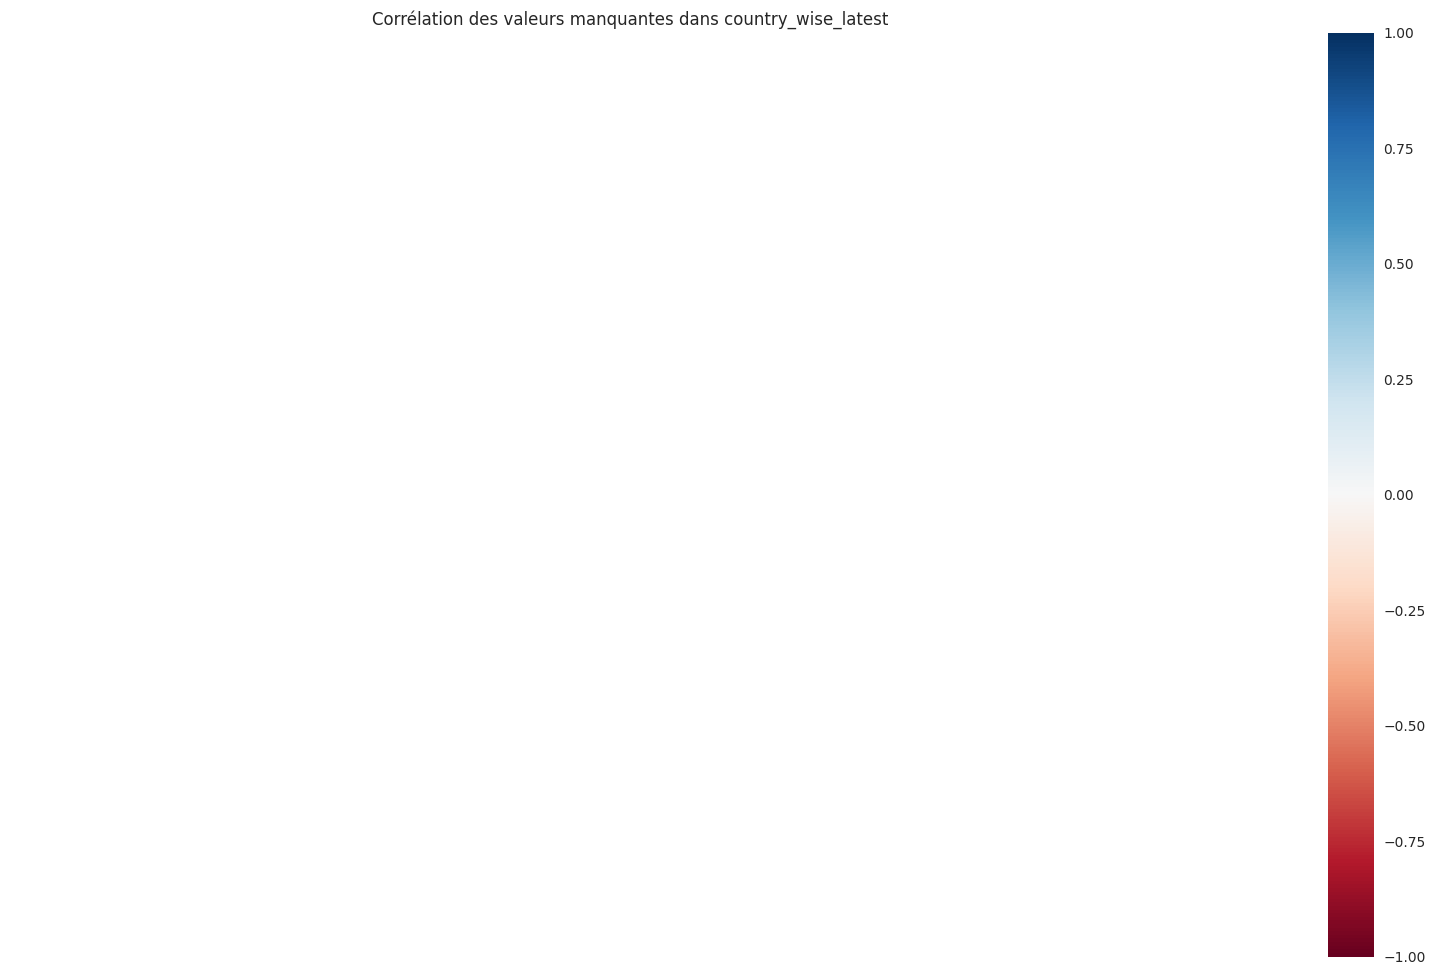


Analyse des valeurs manquantes pour covid_19_clean_complete


<Figure size 1200x600 with 0 Axes>

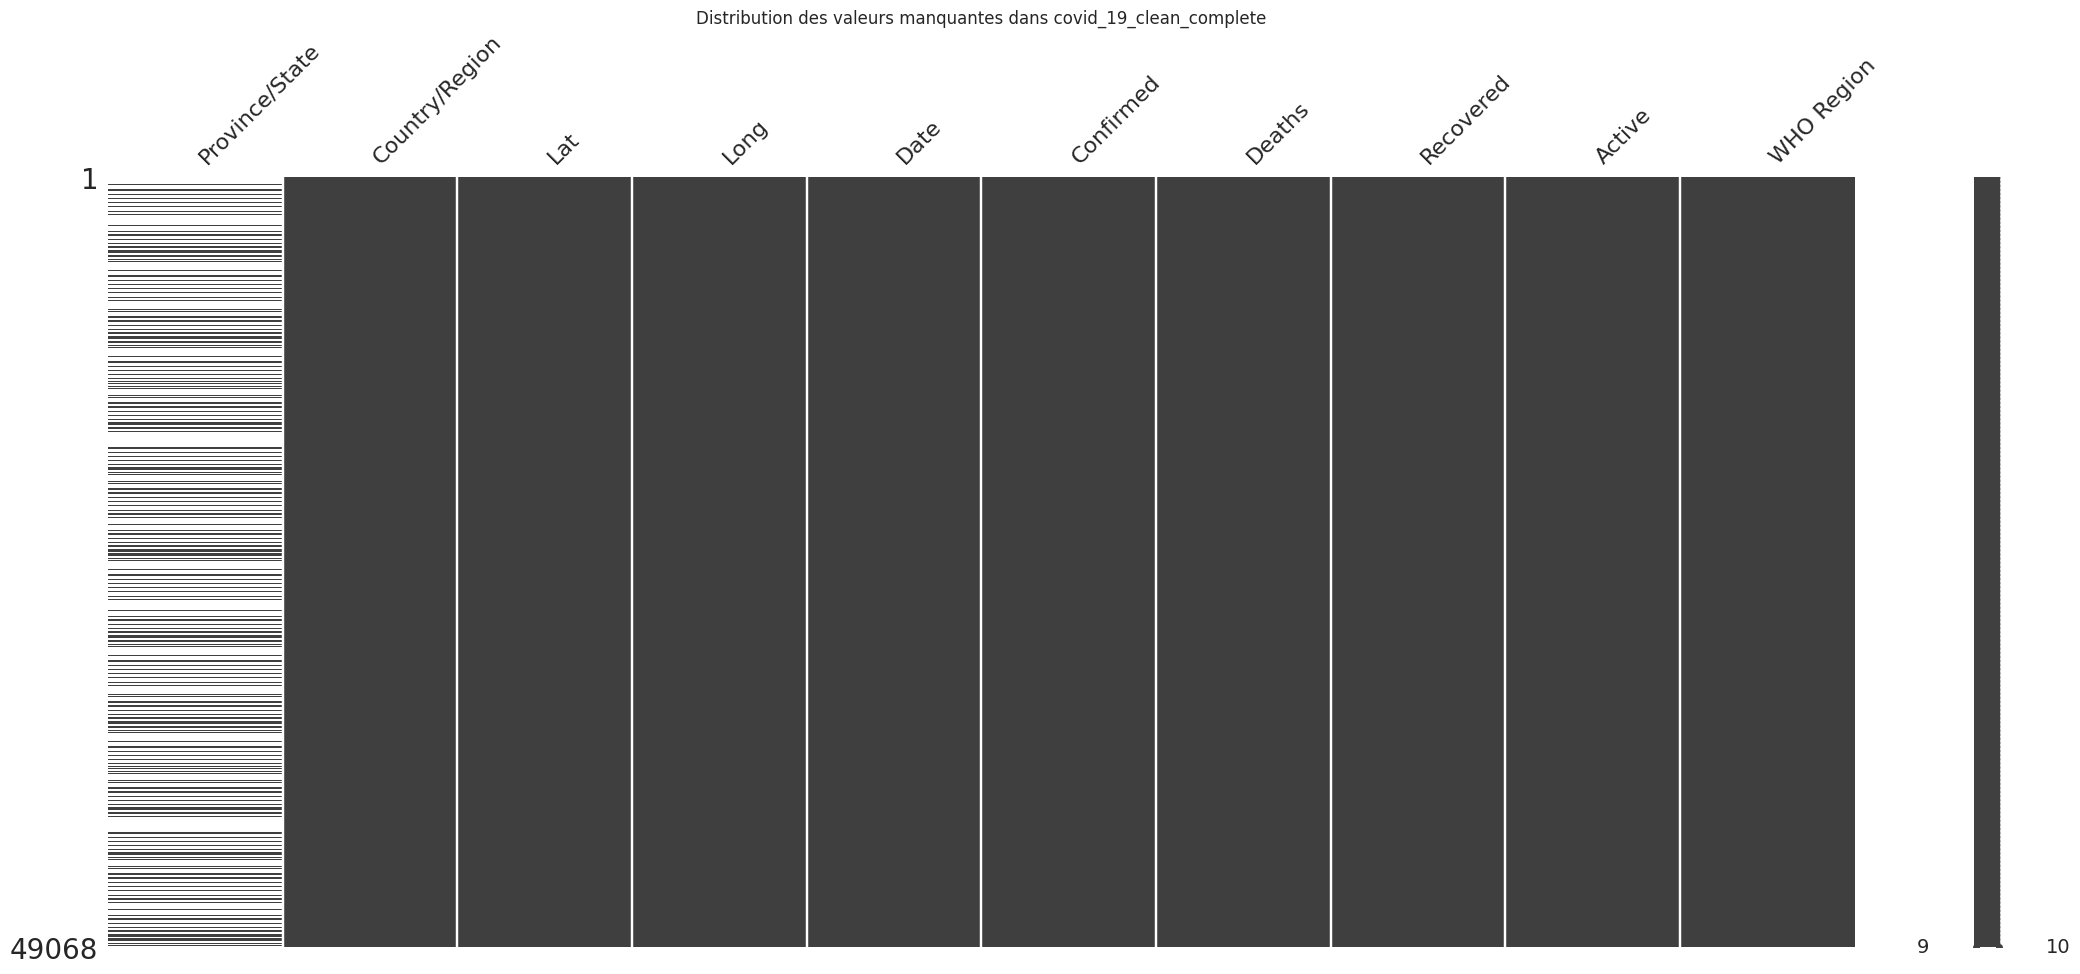

<Figure size 1000x800 with 0 Axes>

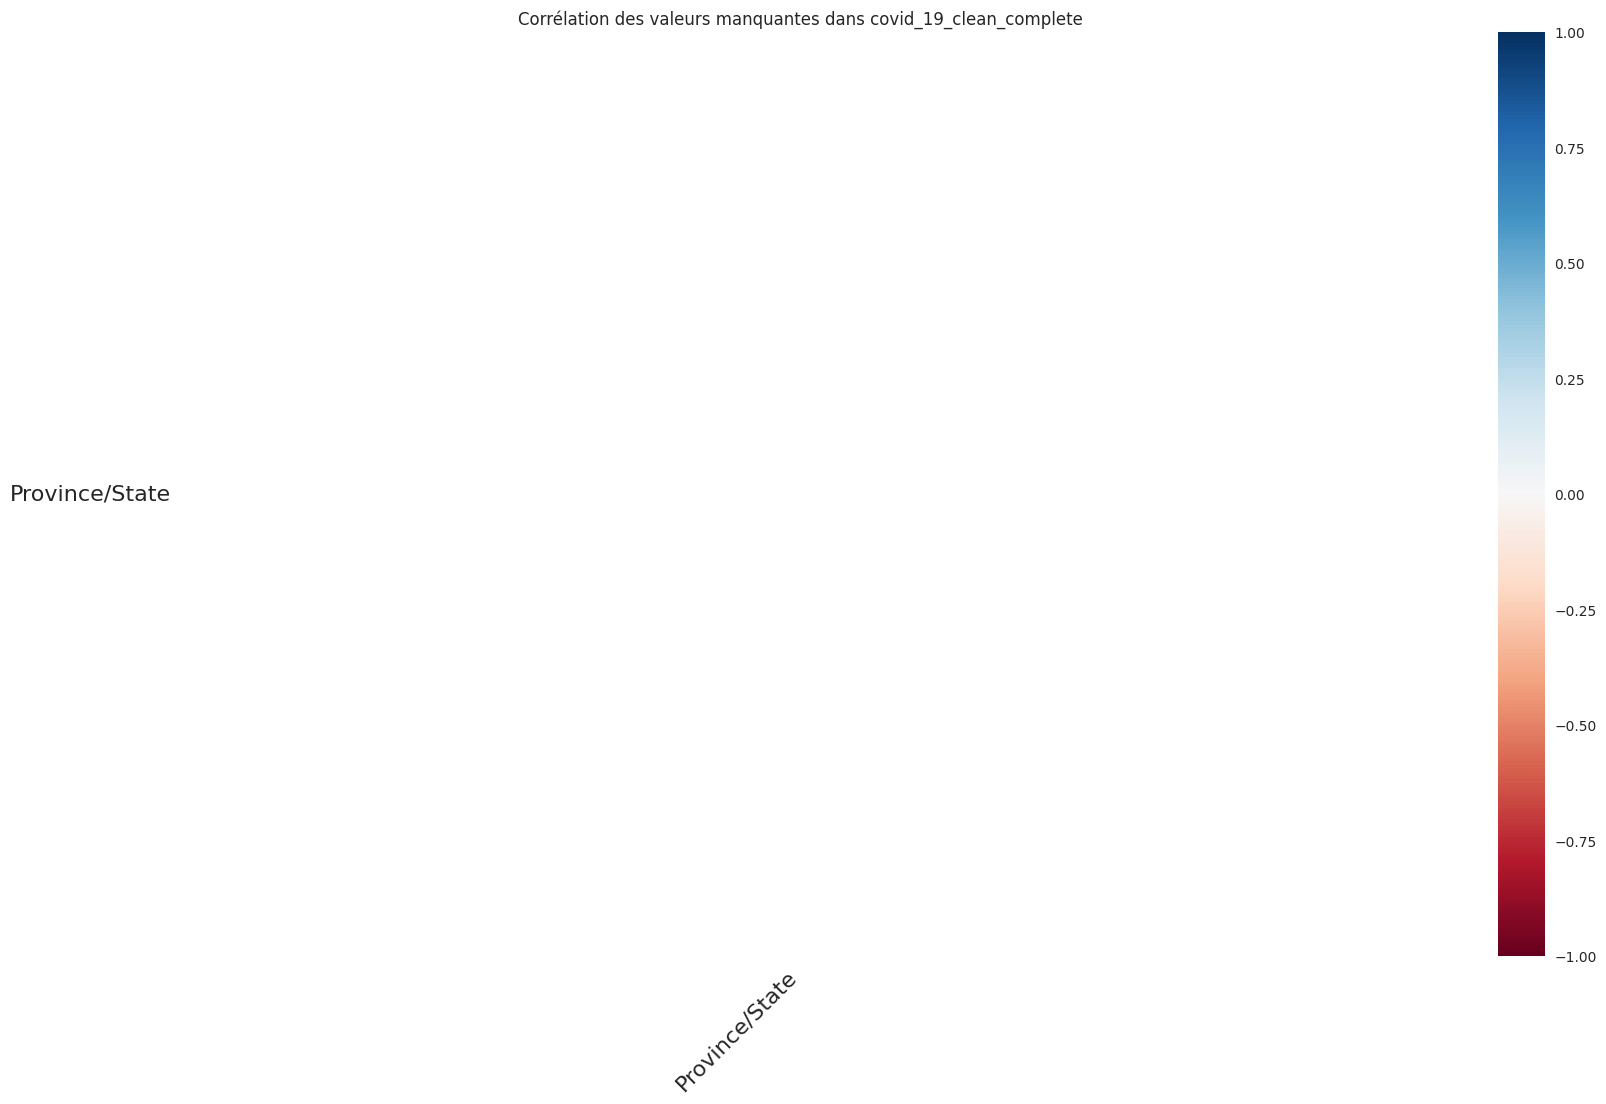


Analyse des valeurs manquantes pour full_grouped


<Figure size 1200x600 with 0 Axes>

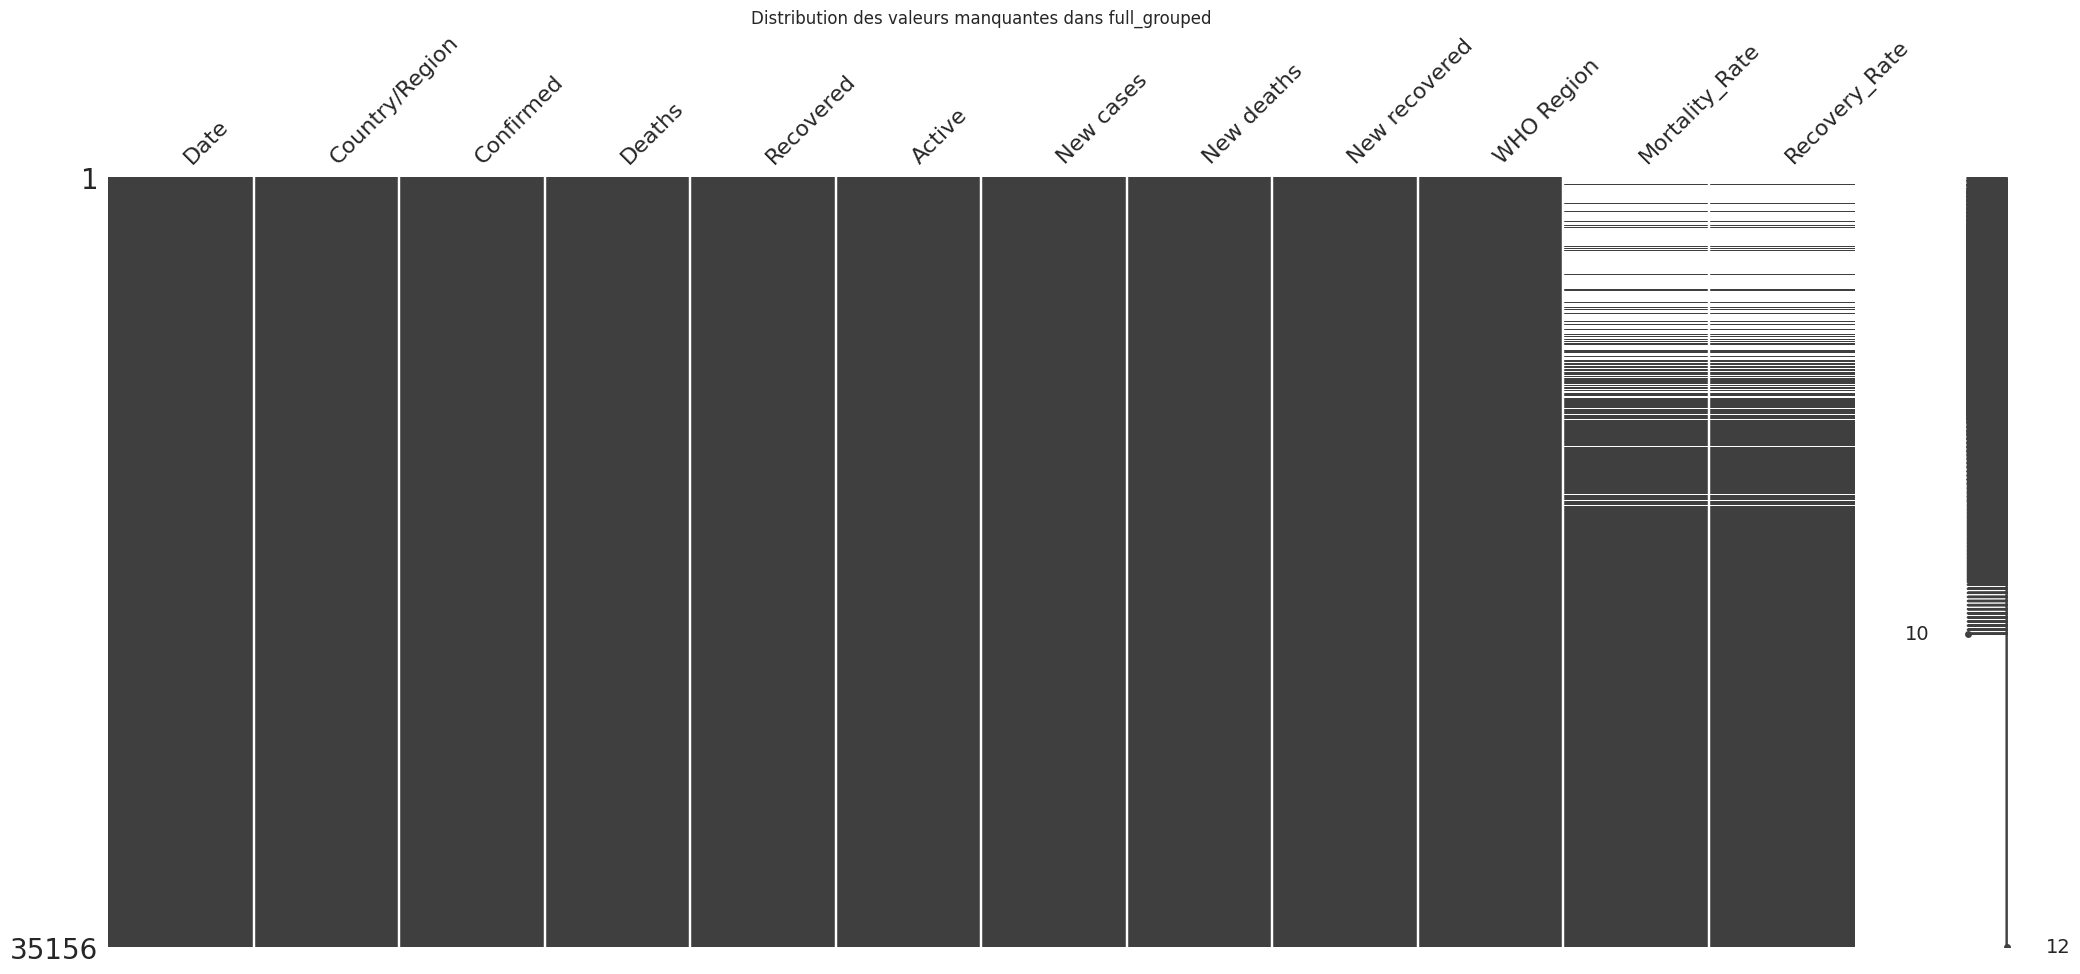

<Figure size 1000x800 with 0 Axes>

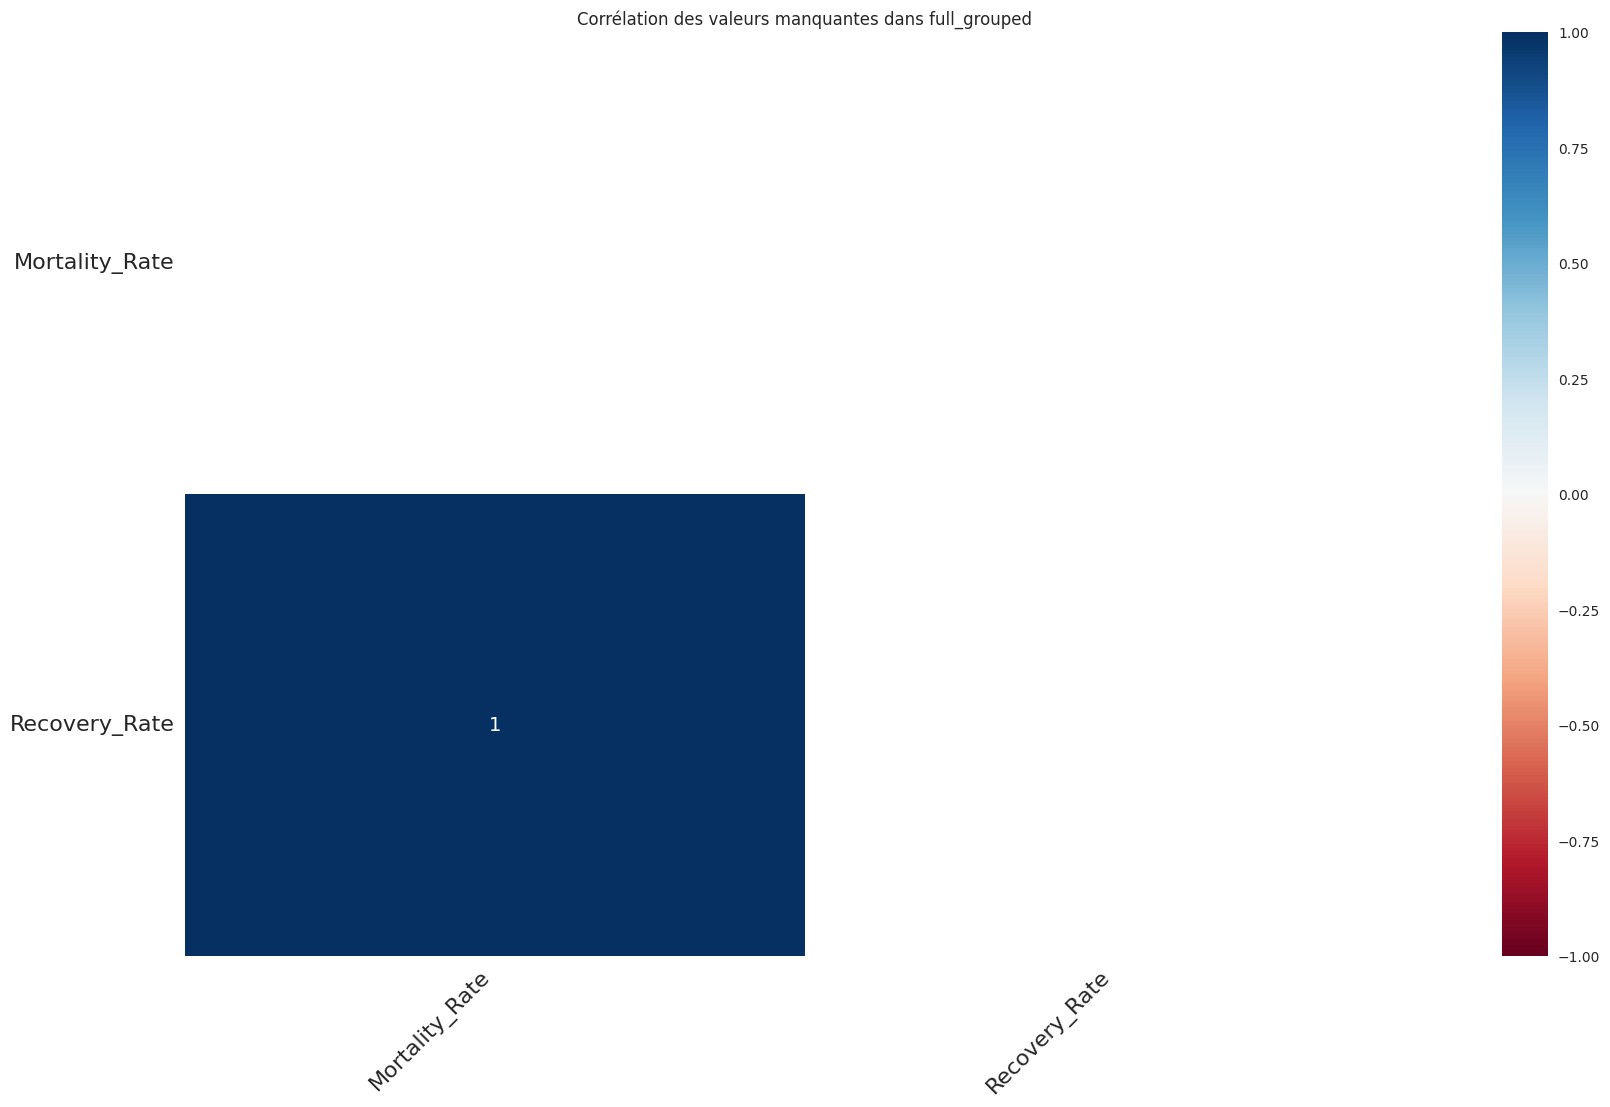


Analyse des valeurs manquantes pour usa_county_wise


<Figure size 1200x600 with 0 Axes>

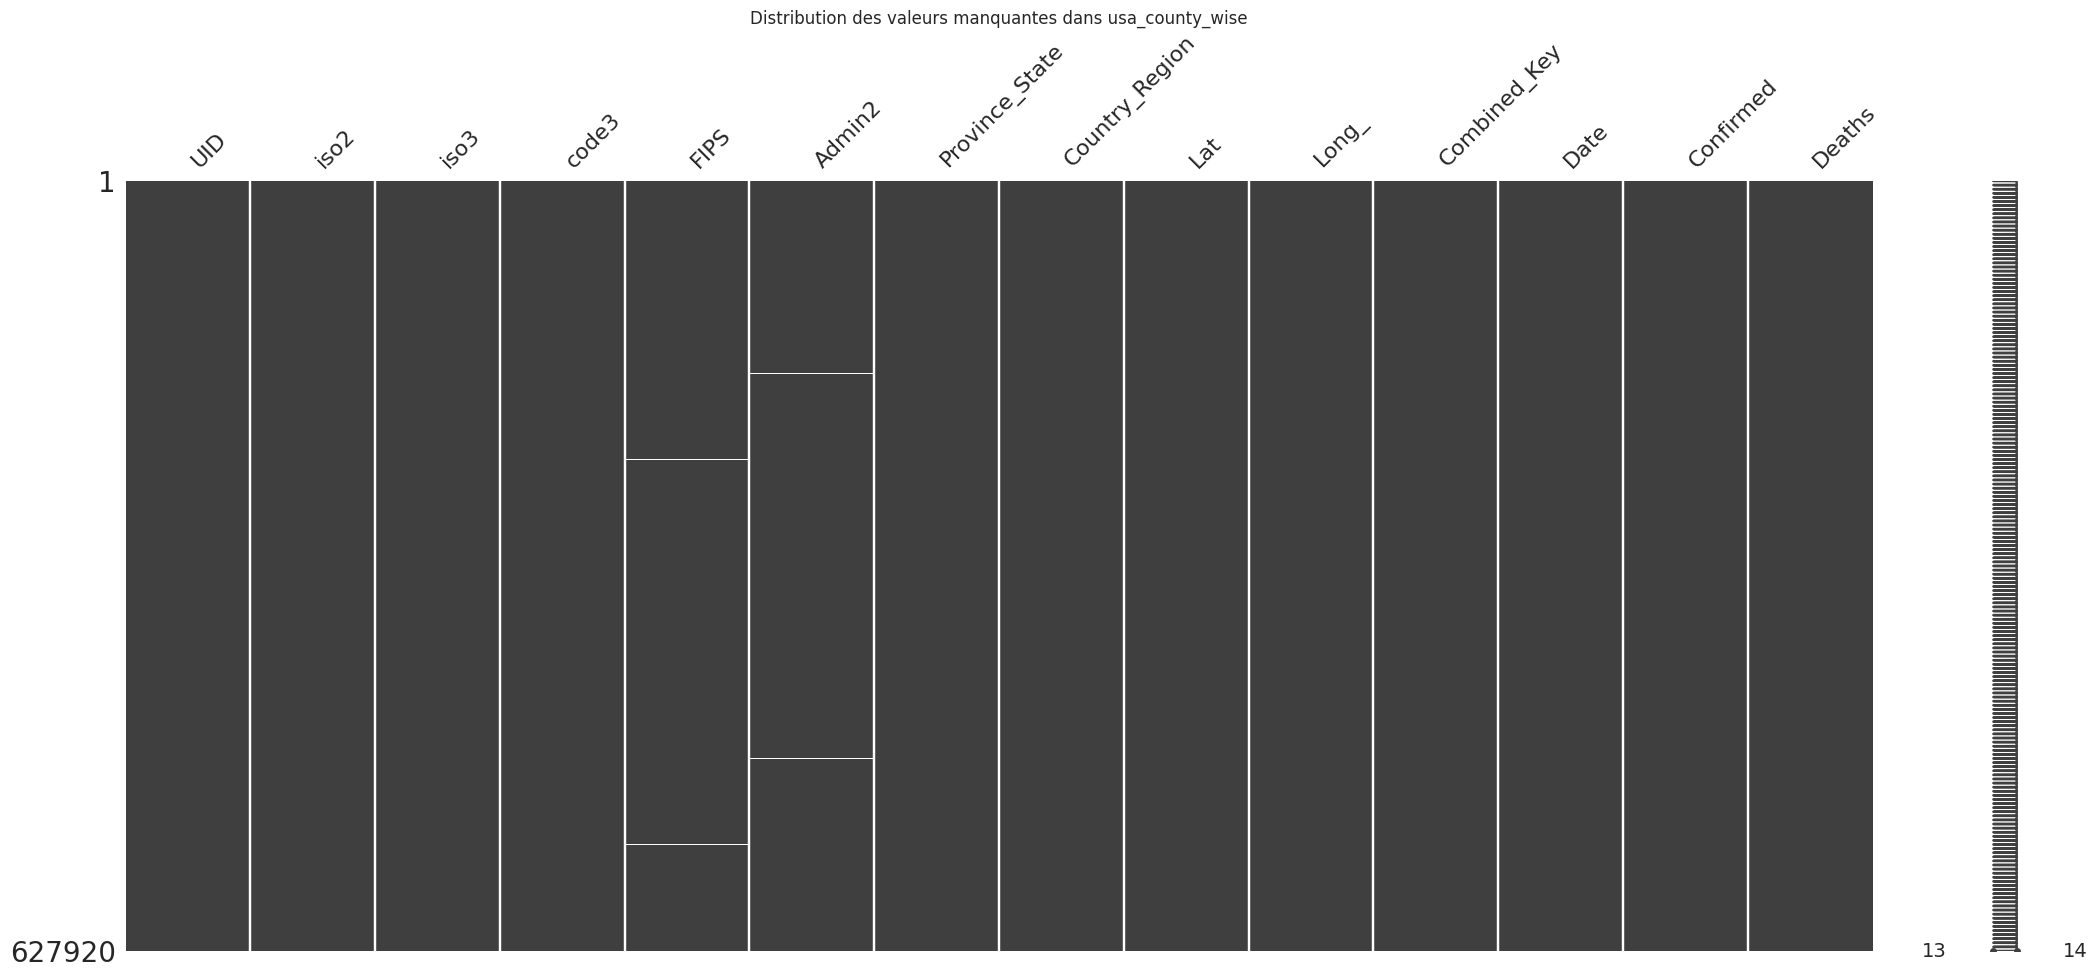

<Figure size 1000x800 with 0 Axes>

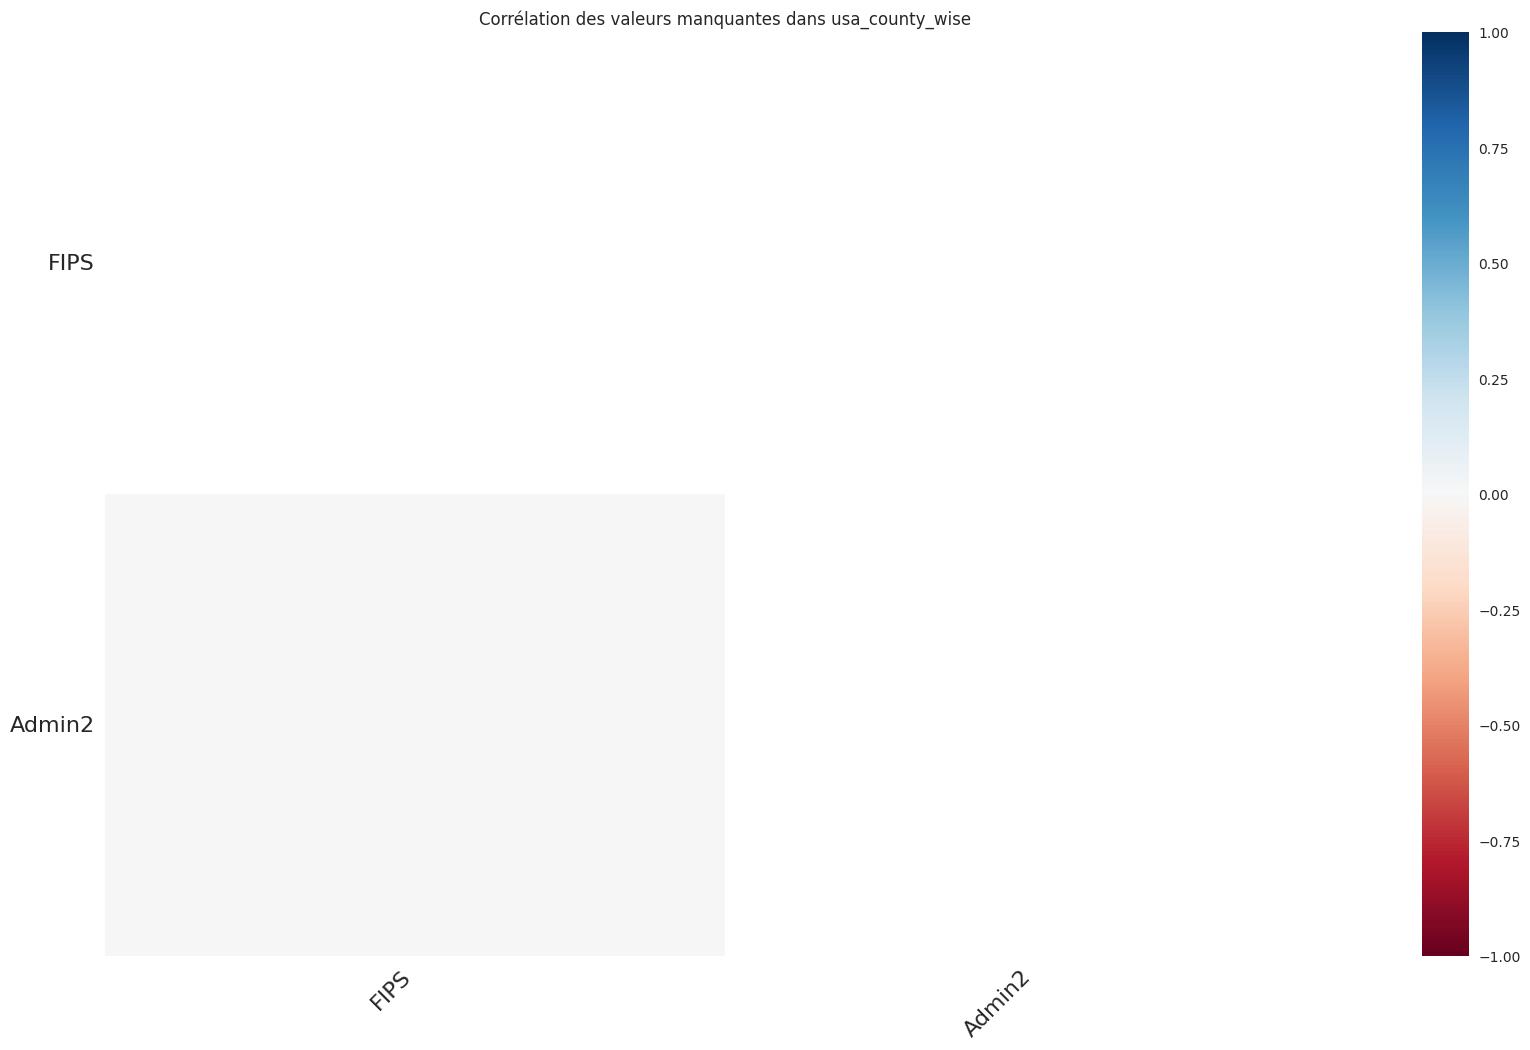


Analyse des valeurs manquantes pour worldometer_coronavirus_daily_data


<Figure size 1200x600 with 0 Axes>

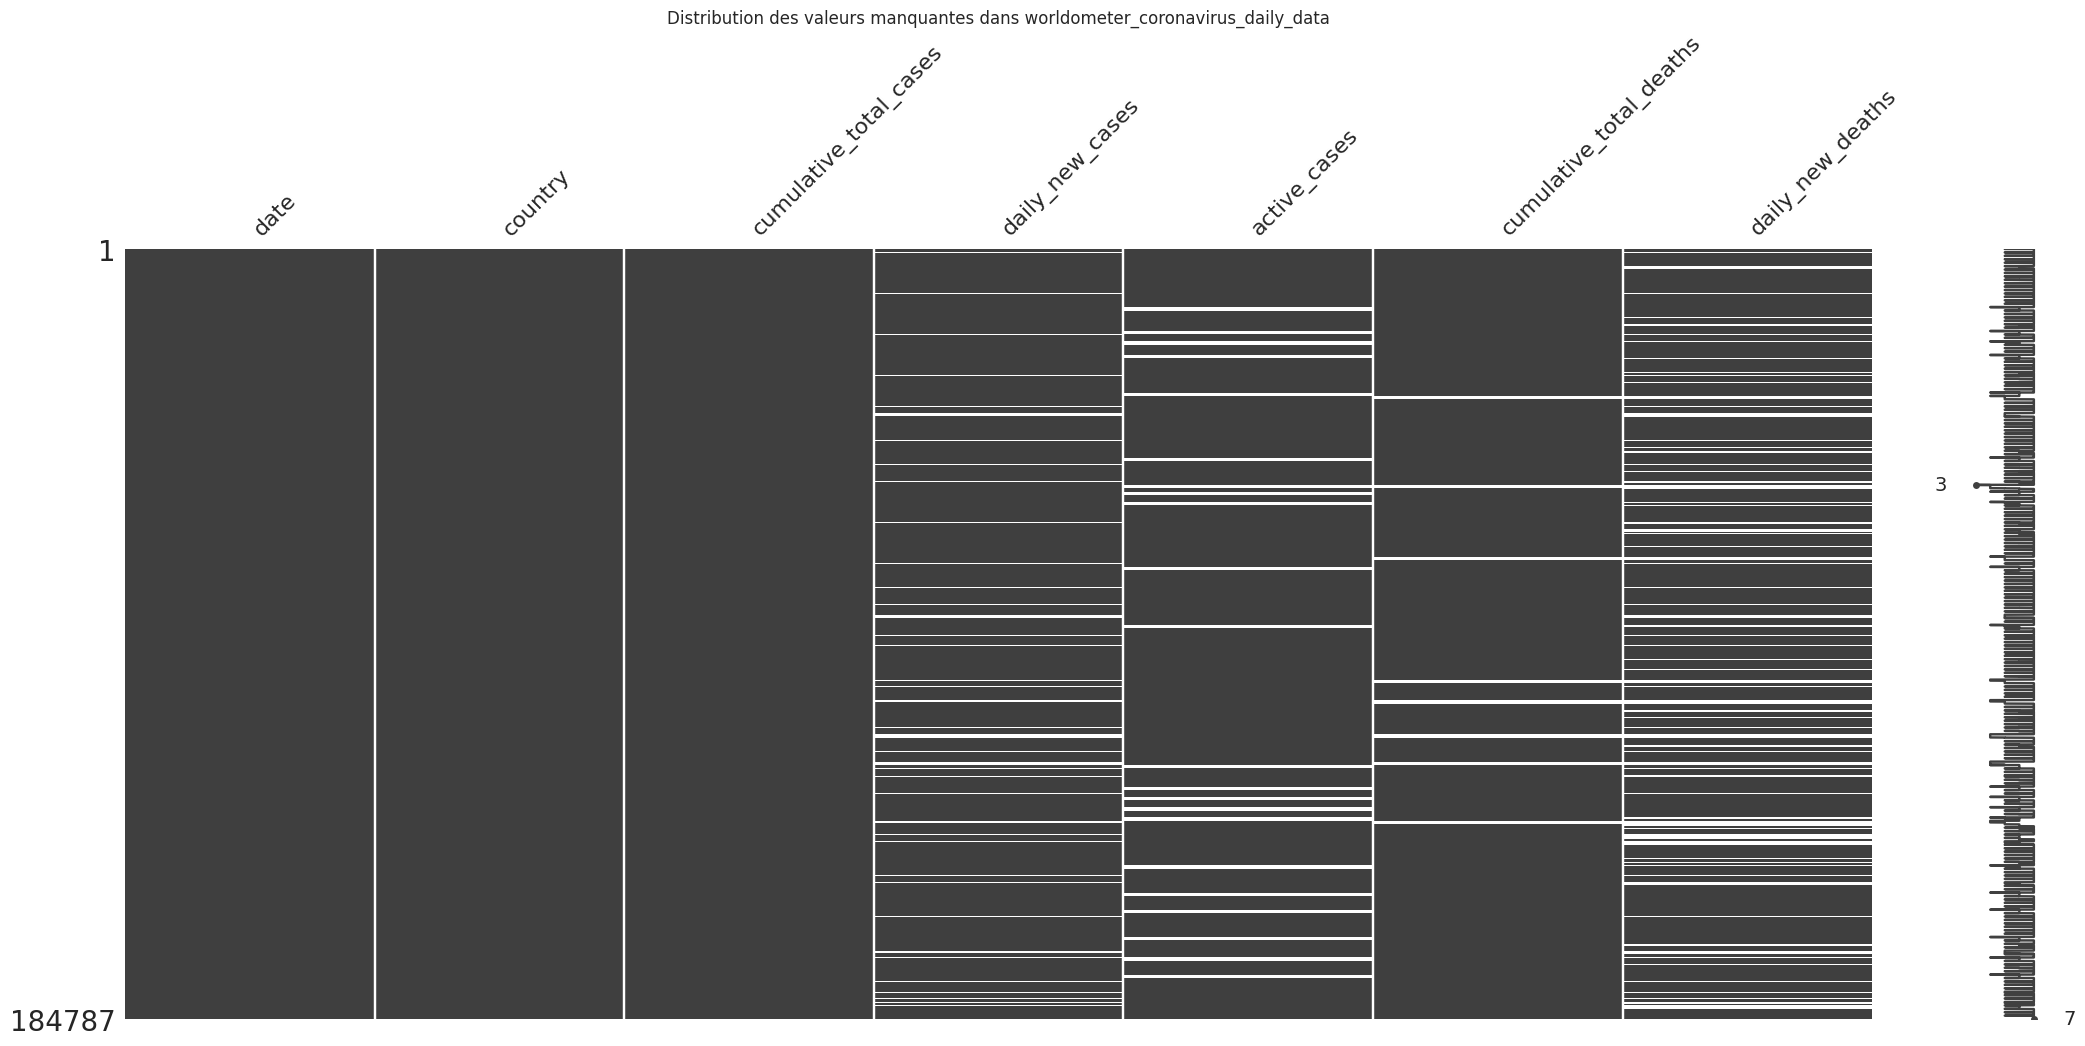

<Figure size 1000x800 with 0 Axes>

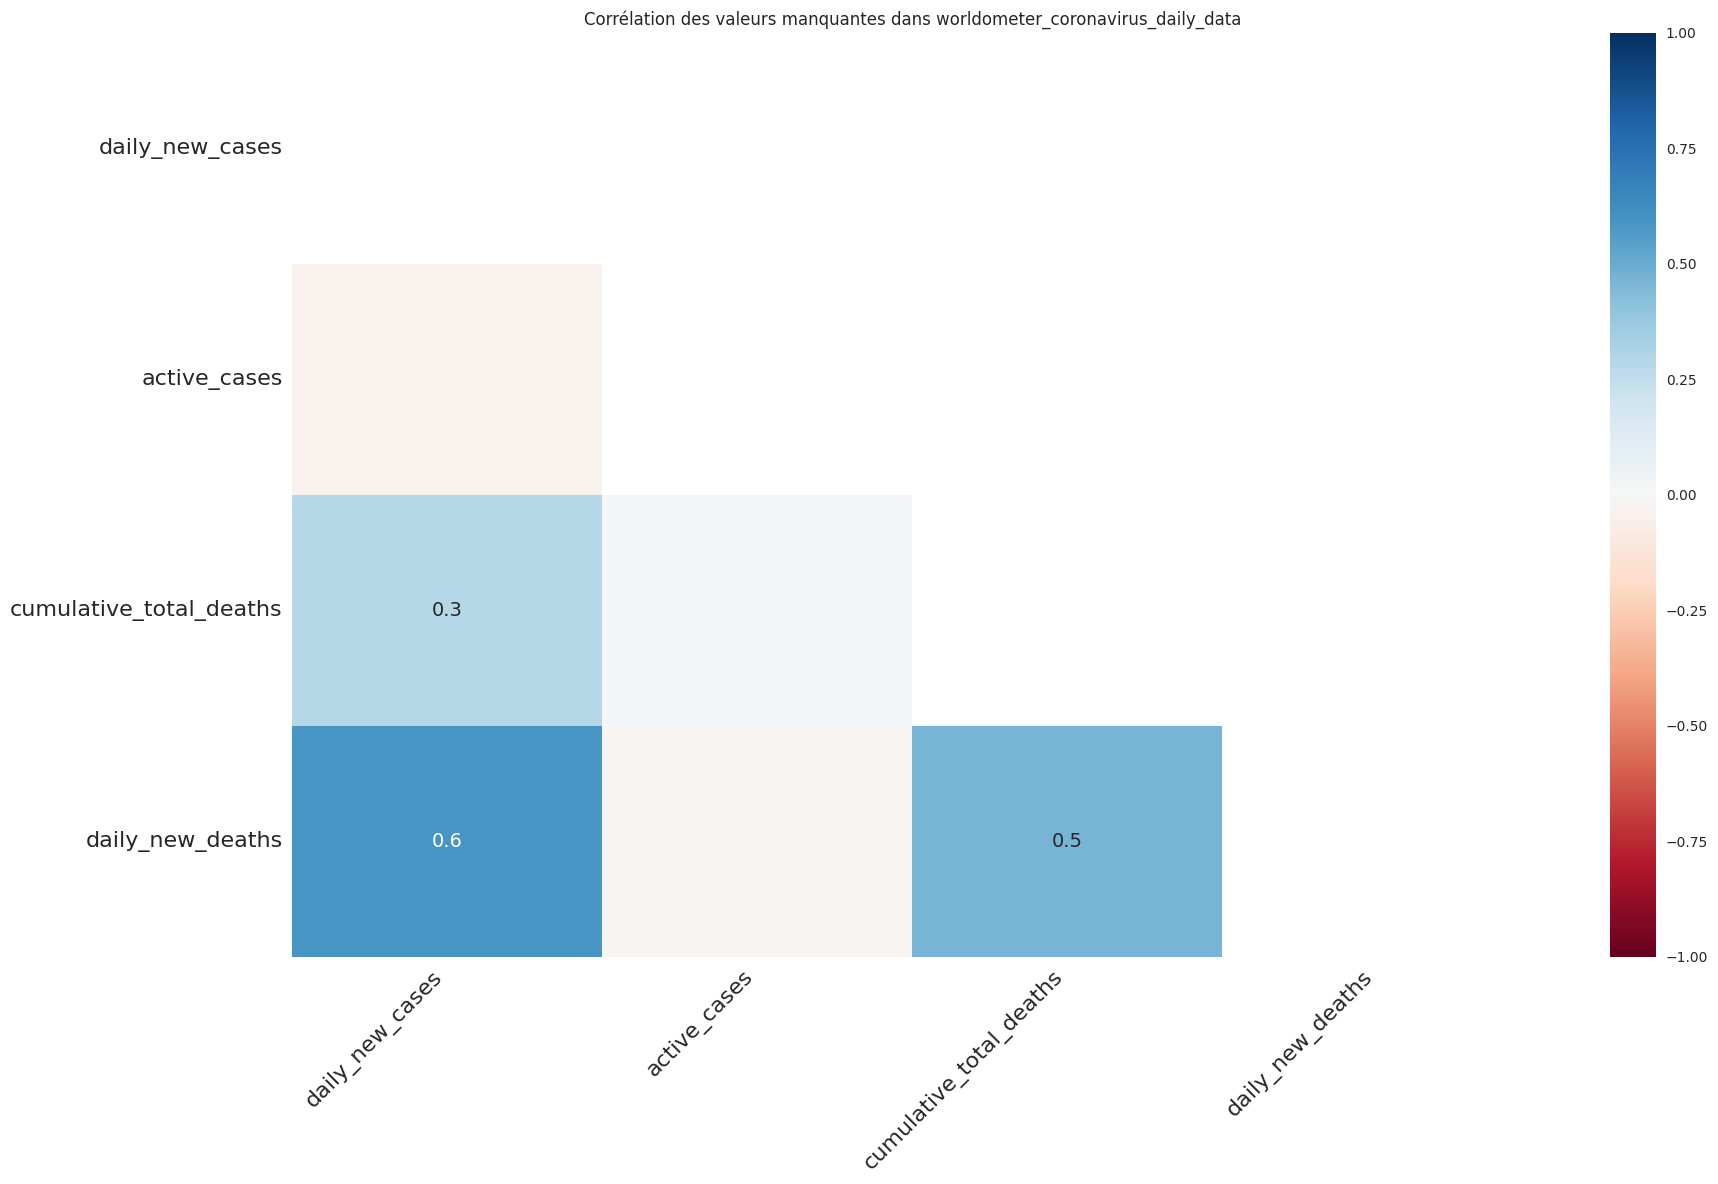


Analyse des valeurs manquantes pour worldometer_coronavirus_summary_data


<Figure size 1200x600 with 0 Axes>

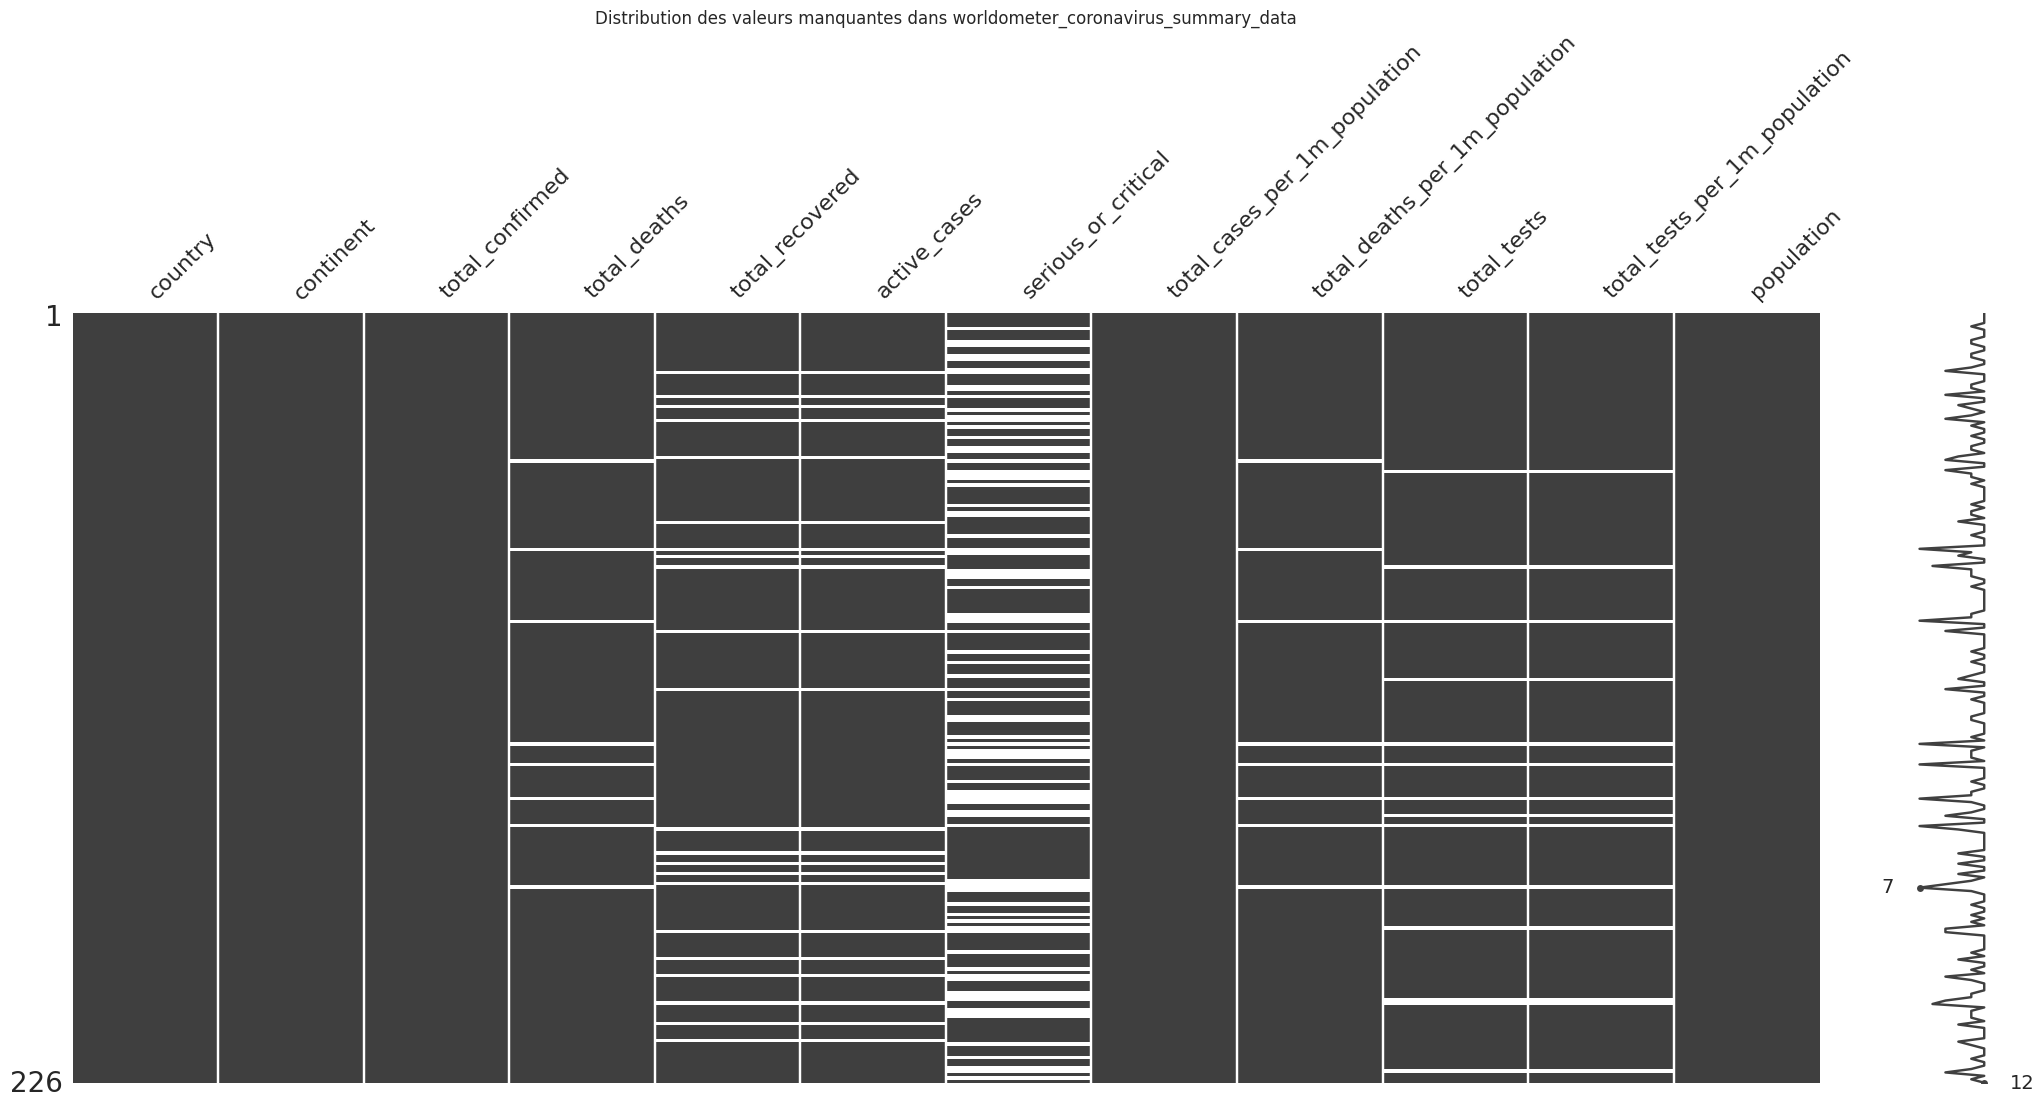

<Figure size 1000x800 with 0 Axes>

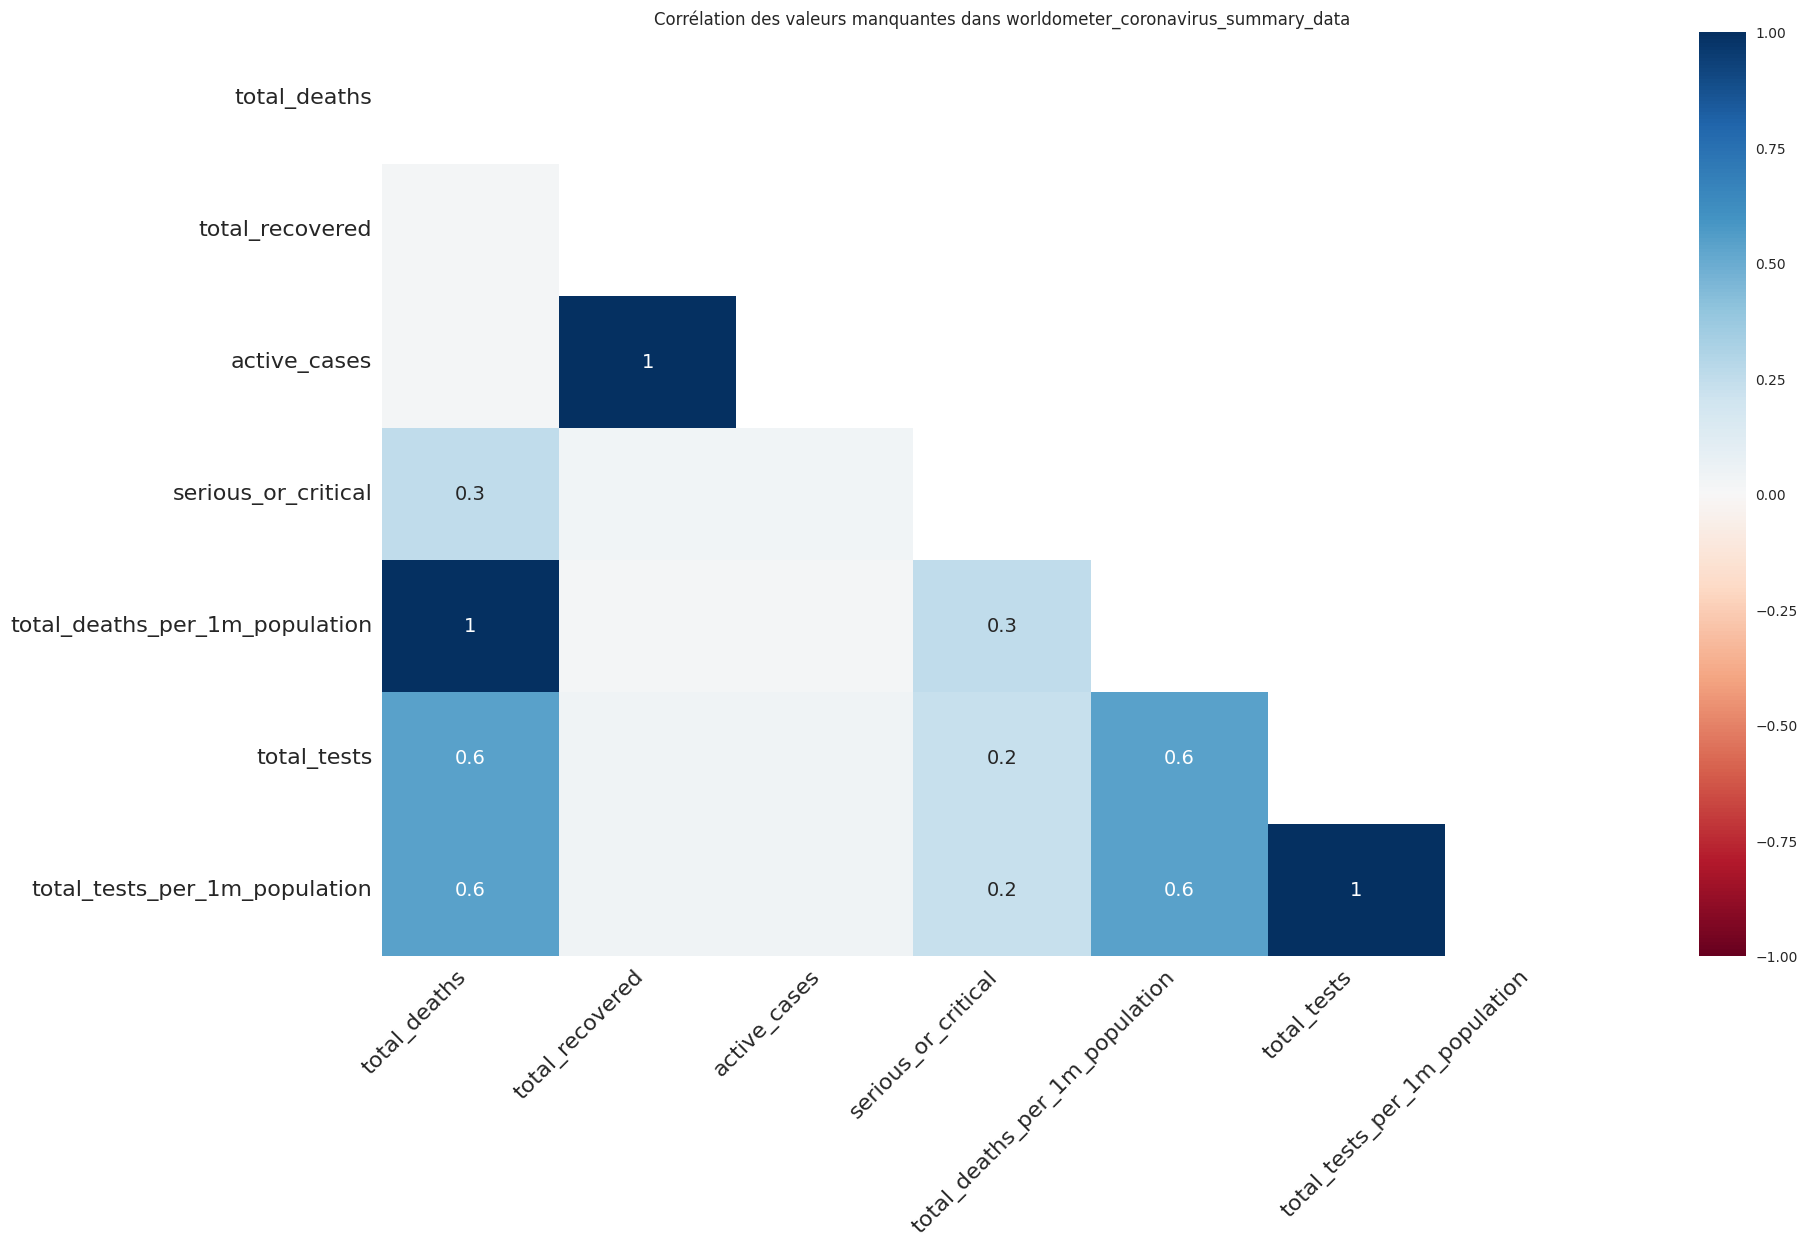


Analyse des valeurs manquantes pour worldometer_data


<Figure size 1200x600 with 0 Axes>

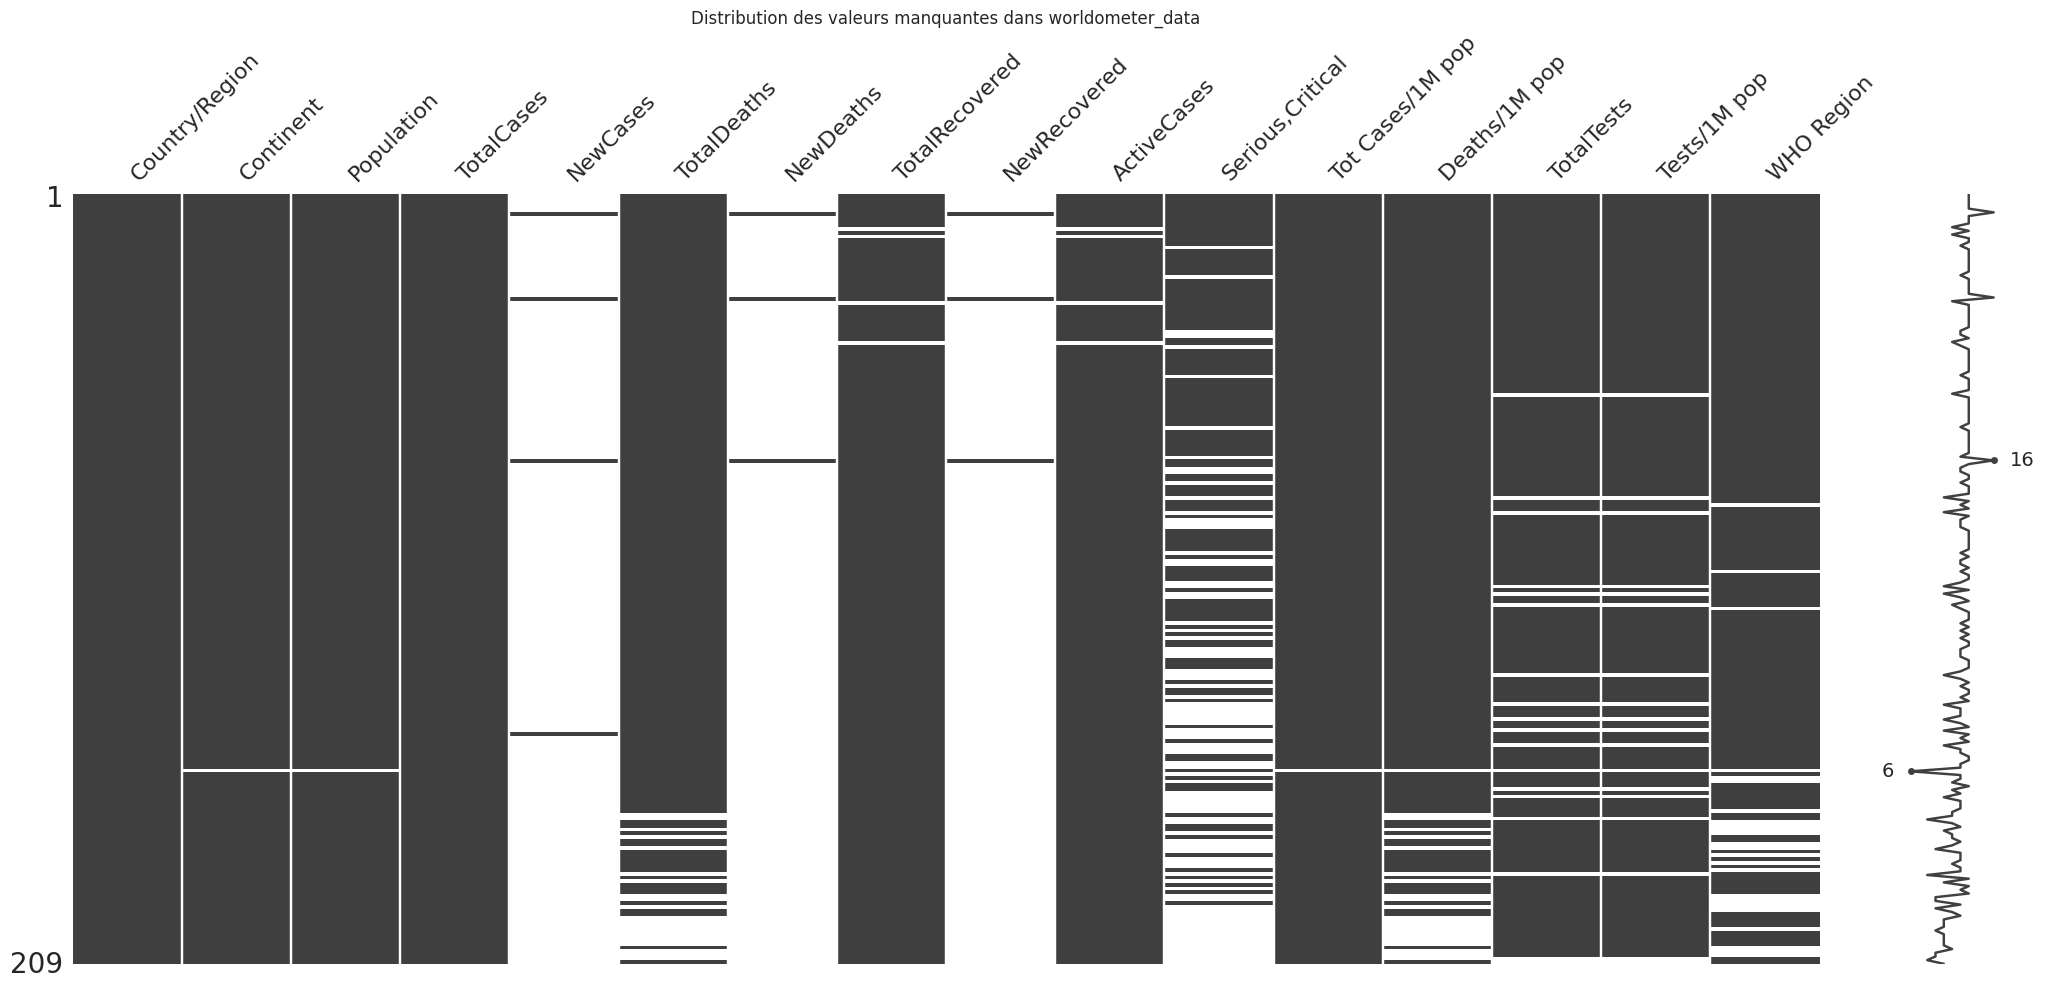

<Figure size 1000x800 with 0 Axes>

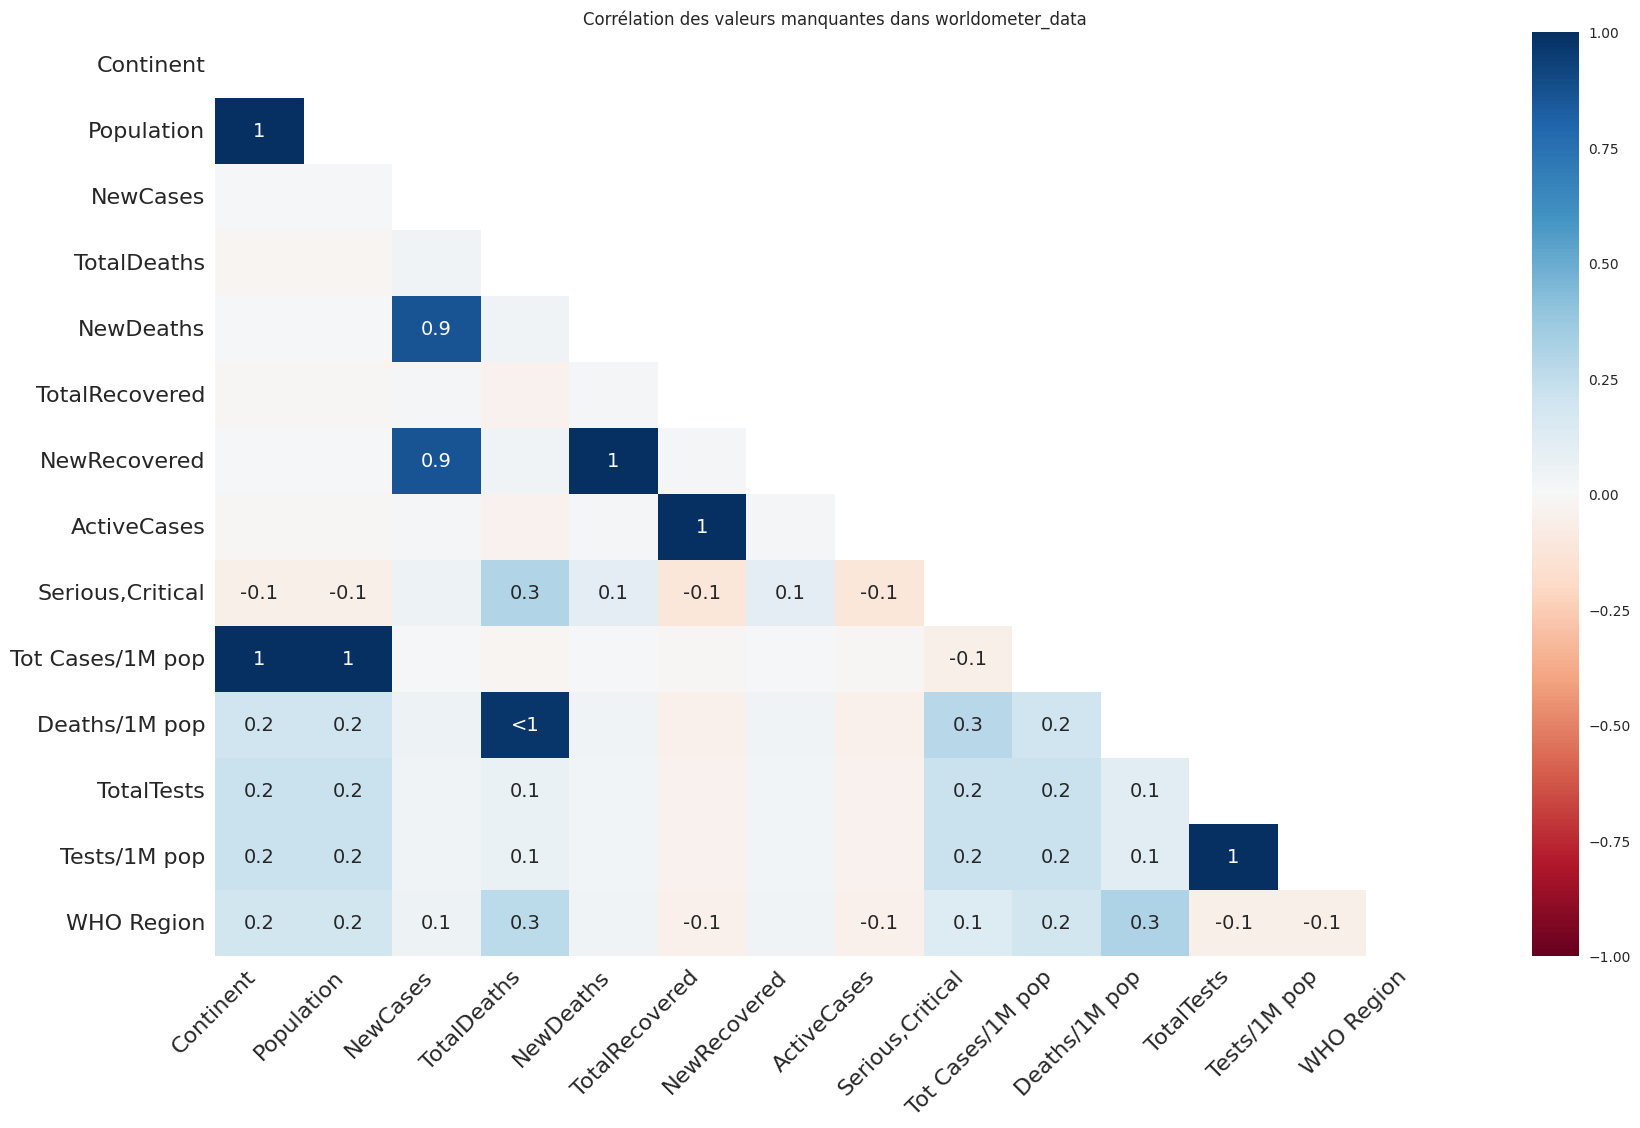

In [27]:
# Analyse des valeurs manquantes pour chaque DataFrame
print("\n=== Analyse des valeurs manquantes ===")
visualize_missing_data(dataframes)


=== Analyse détaillée du DataFrame country_wise_latest ===
Analyse des distributions...


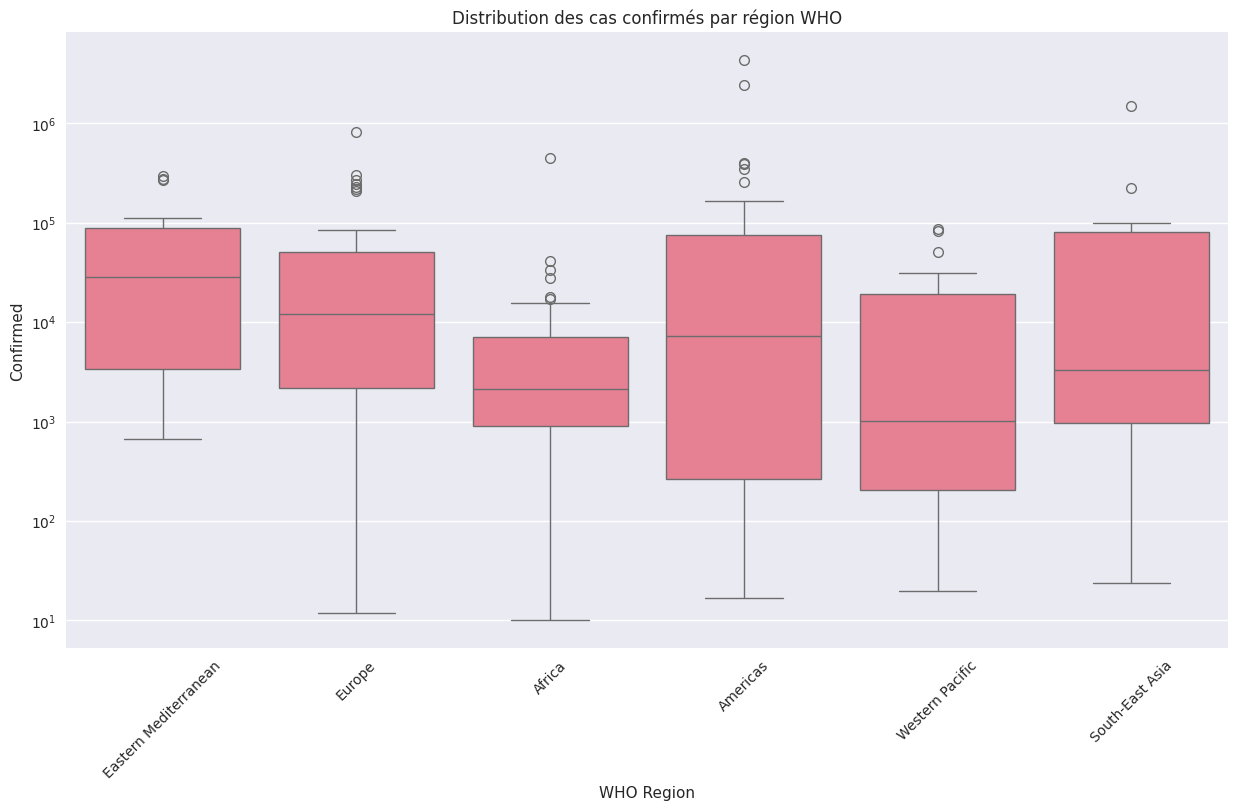

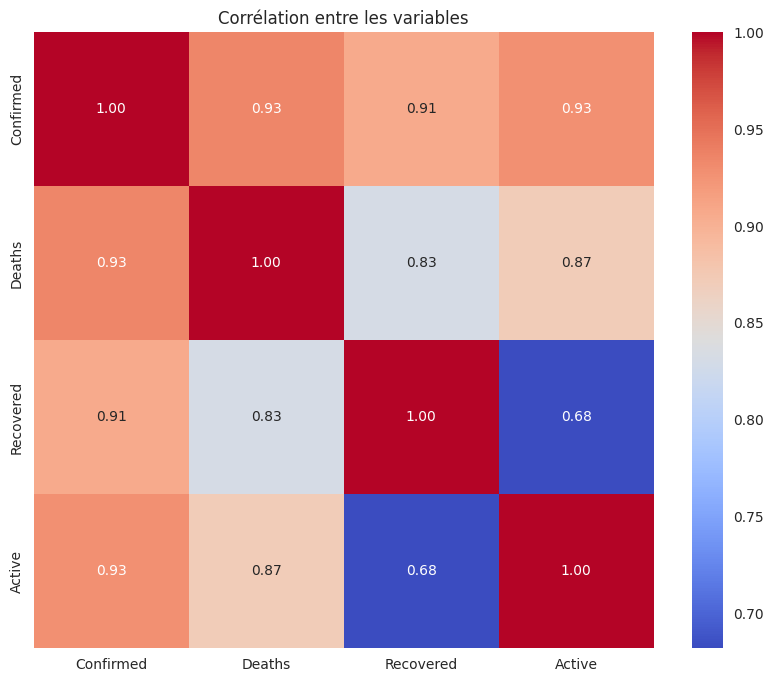

Analyse des ratios...


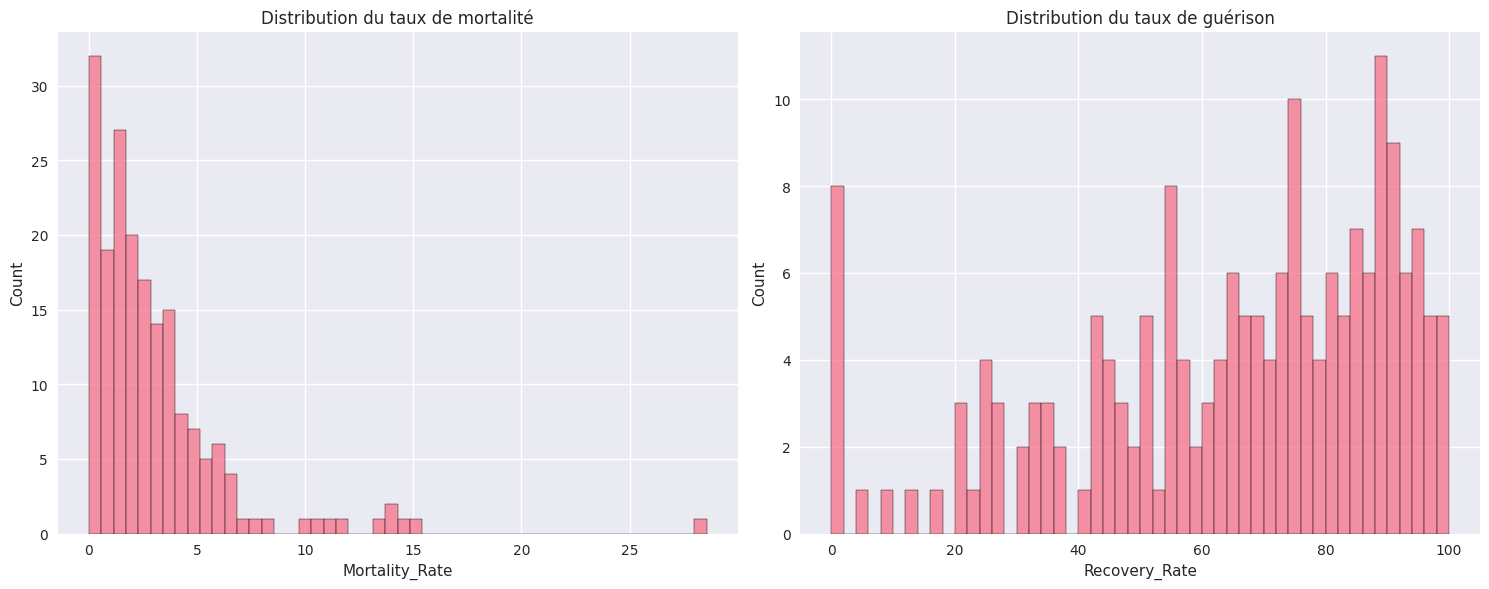

Analyse des valeurs aberrantes...


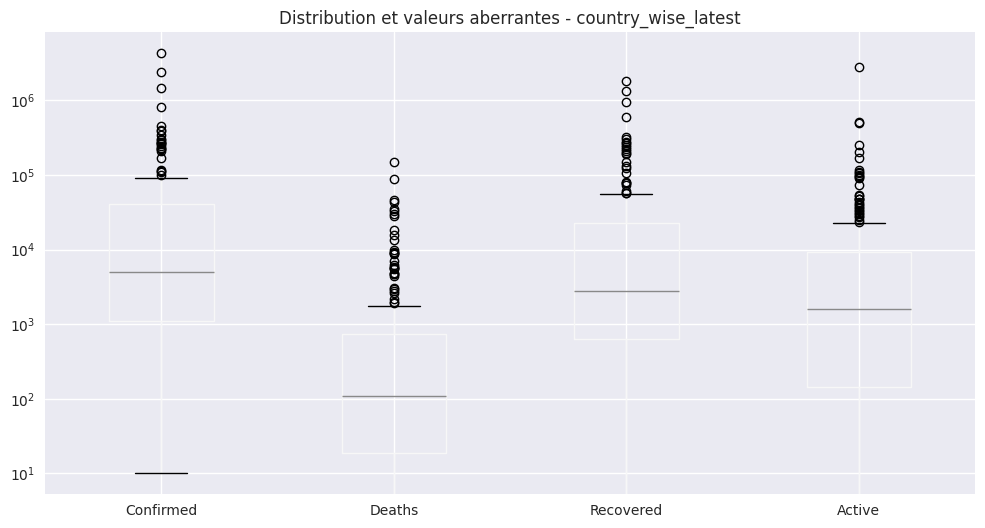


Statistiques descriptives:
          Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   187.000000     187.000000          187.000000             187.000000   
mean     28.957219     933.812834            3.019519              64.820535   
std     120

/home/dvivant/myenv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


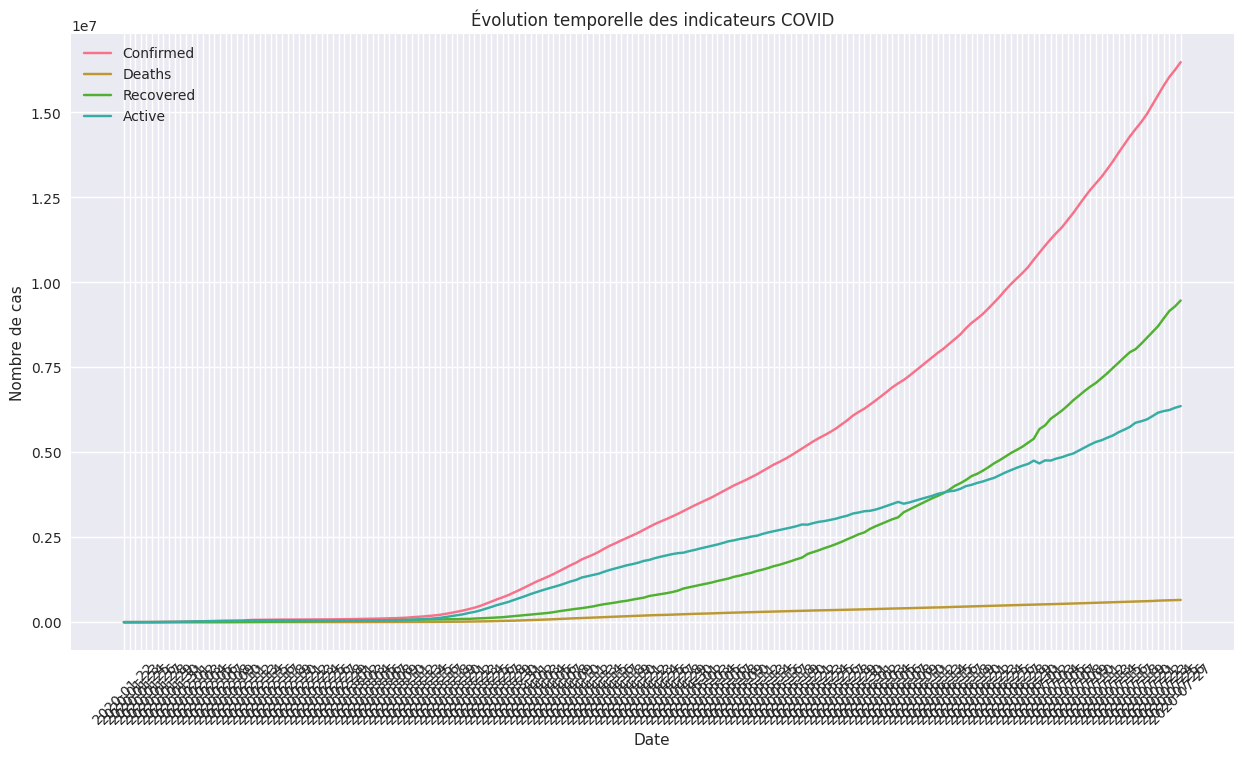

Analyse des distributions...


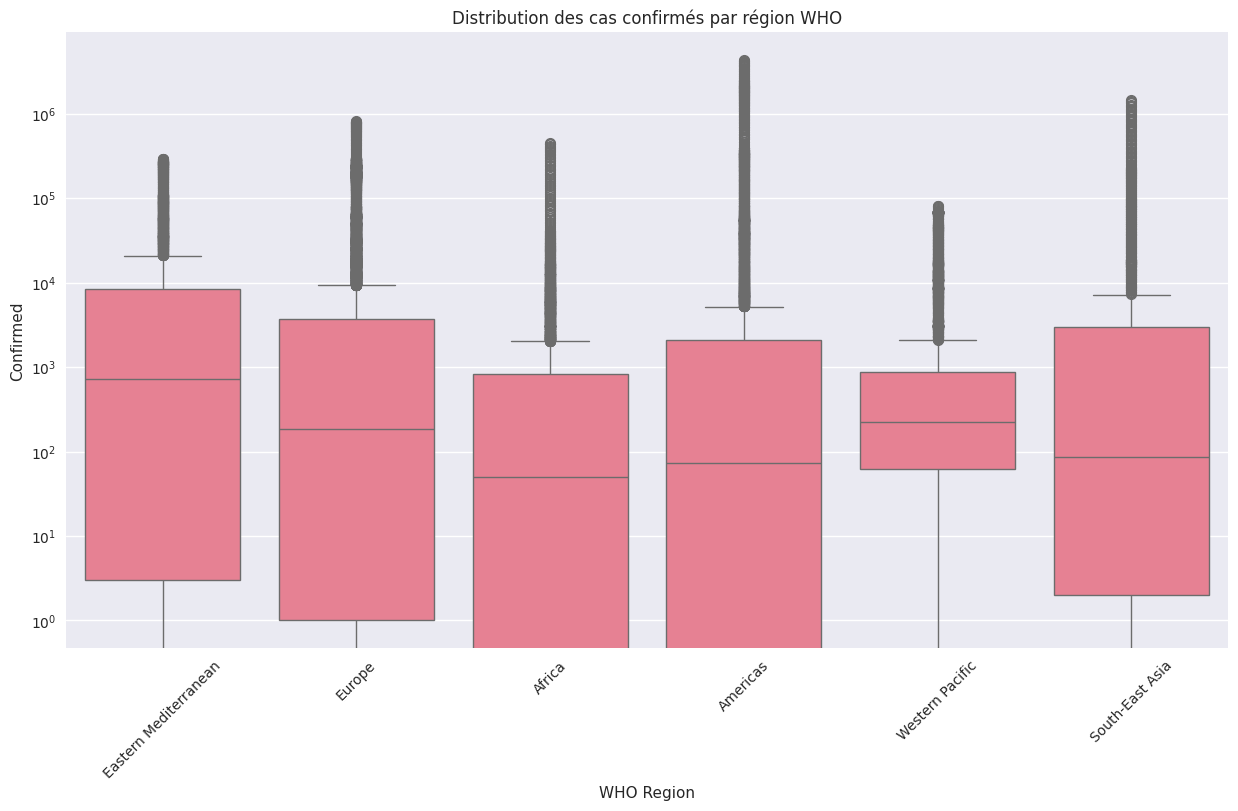

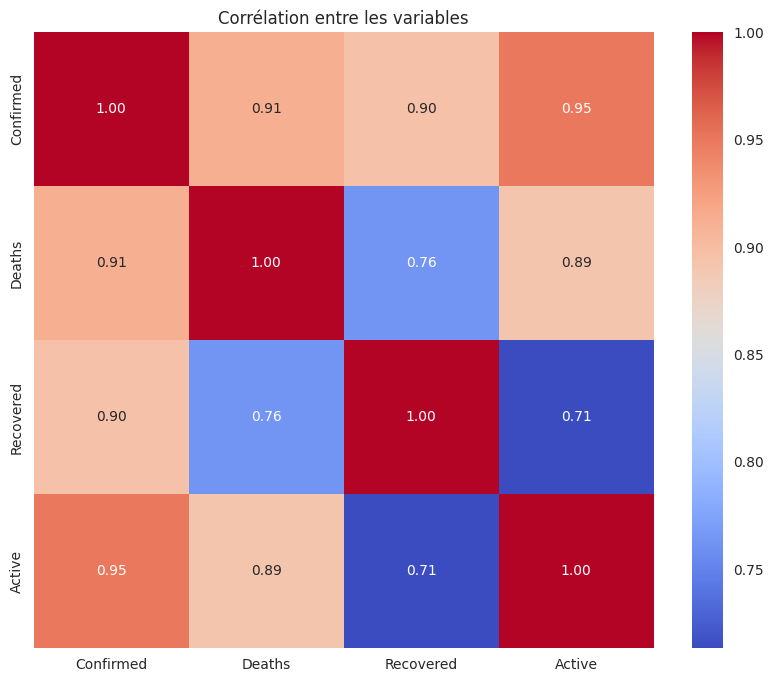

Analyse des ratios...


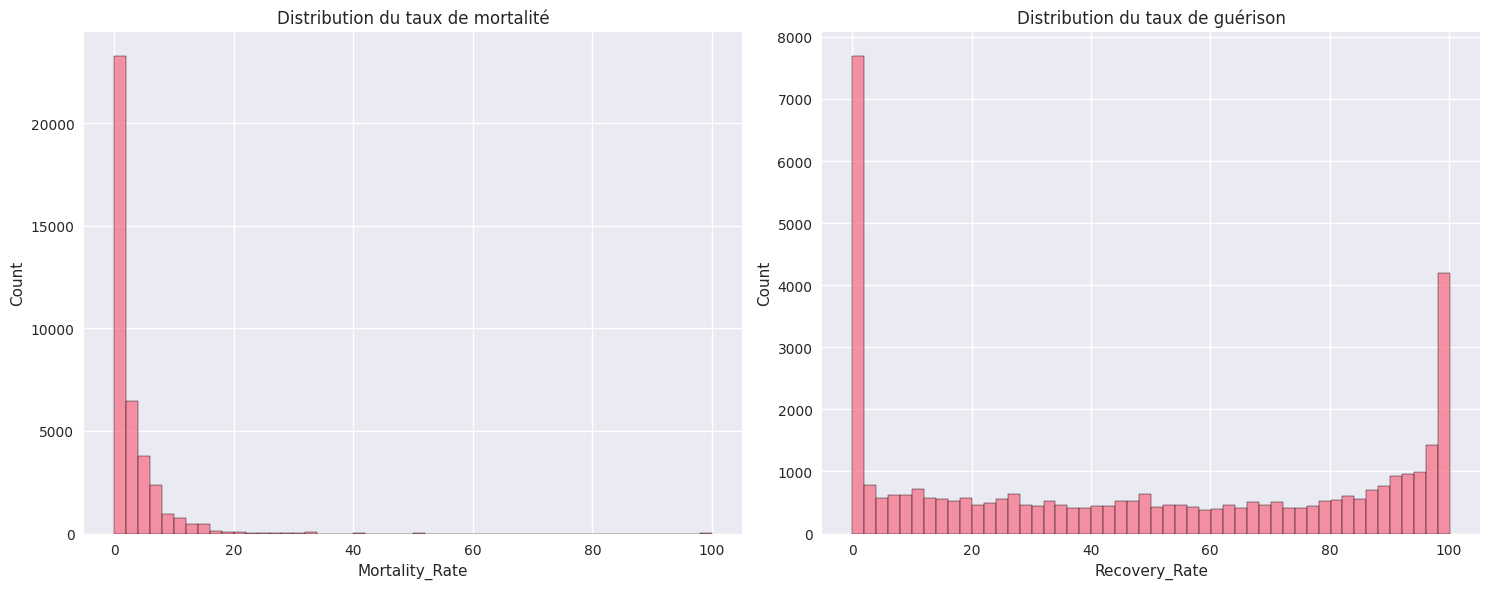

Analyse des valeurs aberrantes...


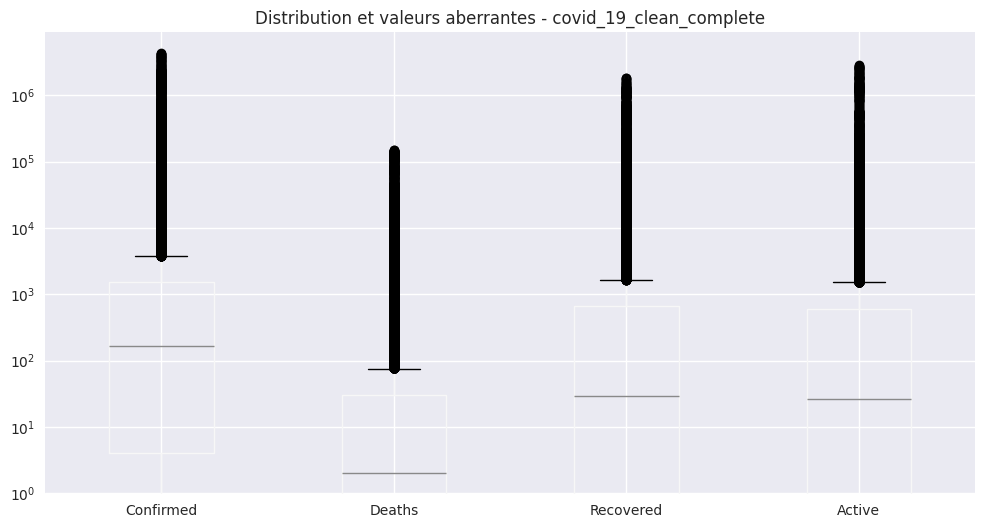


Statistiques descriptives:
                Lat          Long     Confirmed         Deaths     Recovered  \
count  49068.000000  49068.000000  4.906800e+04   49068.000000  4.906800e+04   
mean      21.433730     23.528236  1.688490e+04     884.179160  7.915713e+03   
std       24.950320     70.442740  1.273002e+05    6313.584411  5.480092e+04   
min      -51.796300   -135.000000  0.000000e+00       0.000000  0.000000e+00   
25%        7.873054    -15.310100  4.000000e+00       0.000000  0.000000e+00   
50%       23.634500     21.745300  1.680000e+02       2.000000  2.900000e+01   
75%       41.204380     80.771797  1.518250e+03      30.000000  6.660000e+02   
max       71.706900    178.065000  4.290259e+06  148011.000000  1.846641e+06   

             Active  Mortality_Rate  Recovery_Rate  
count  4.906800e+04    39009.000000   39009.000000  
mean   8.085012e+03        2.799382      47.530670  
std    7.625890e+04        4.386398      37.511083  
min   -1.400000e+01        0.000000    

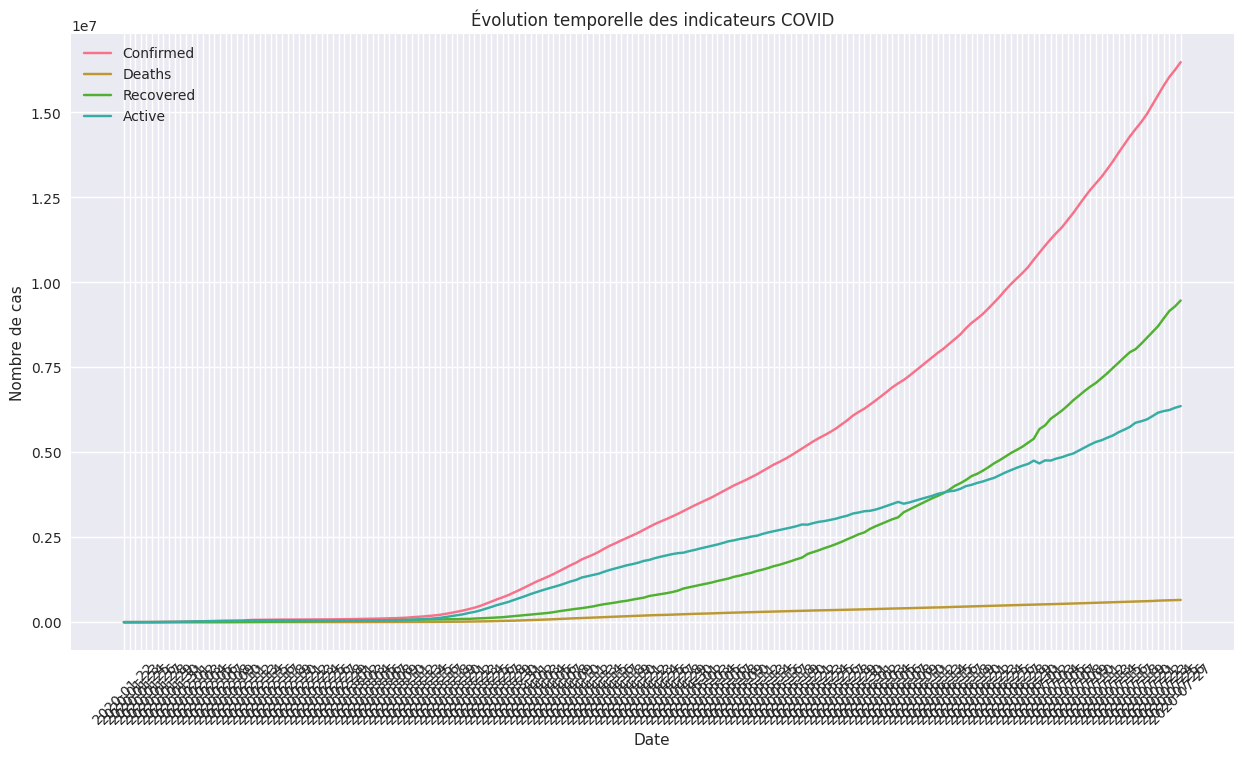

Analyse des distributions...


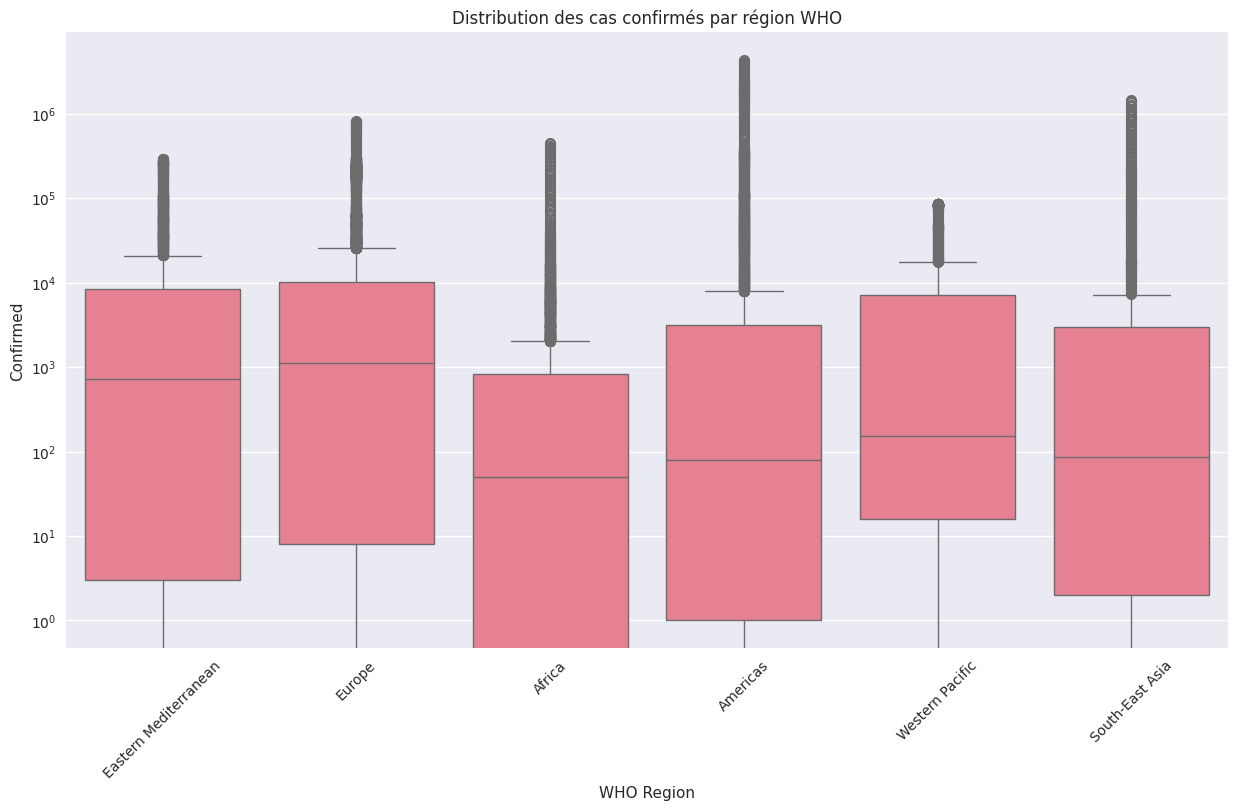

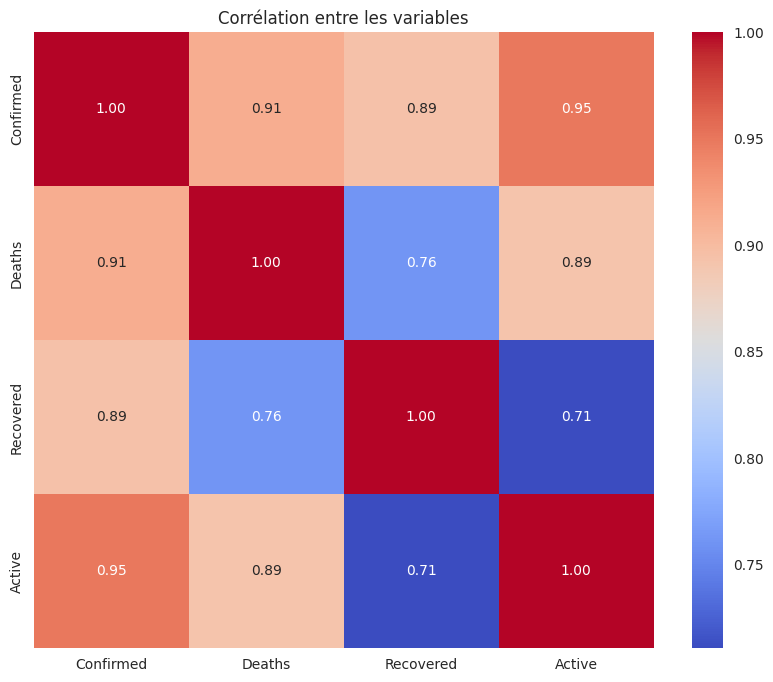

Analyse des ratios...


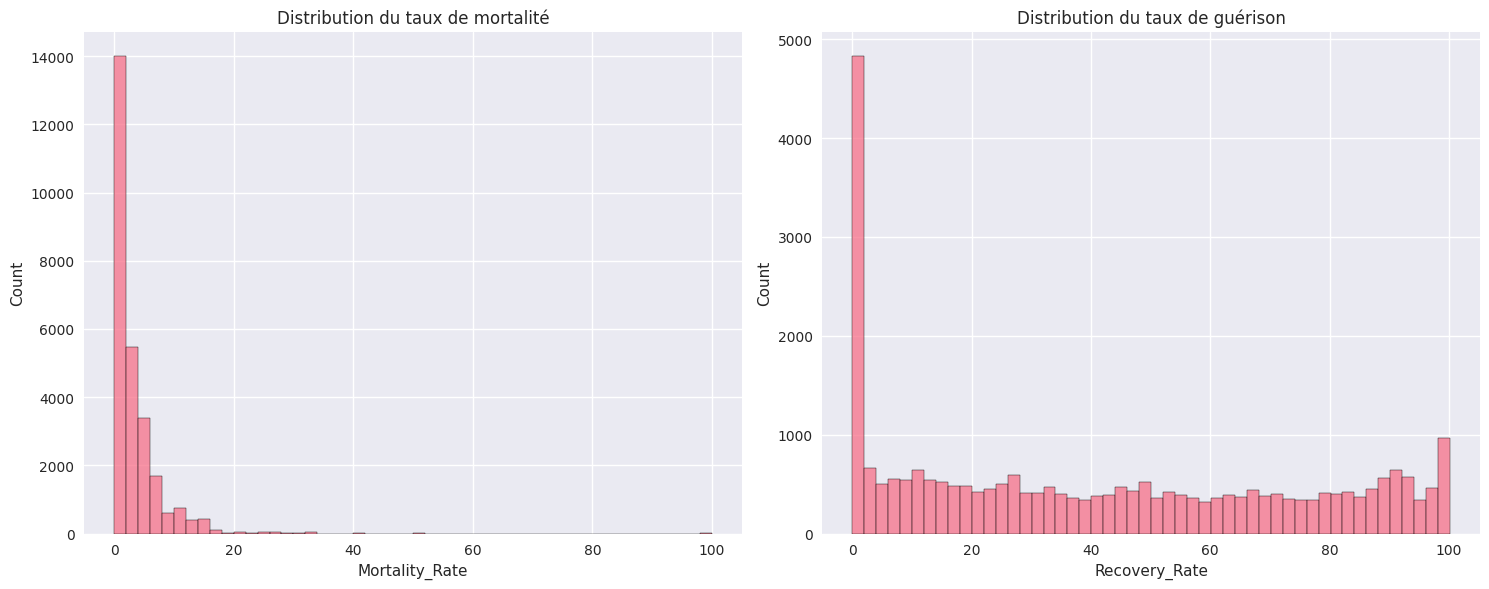

Analyse des valeurs aberrantes...


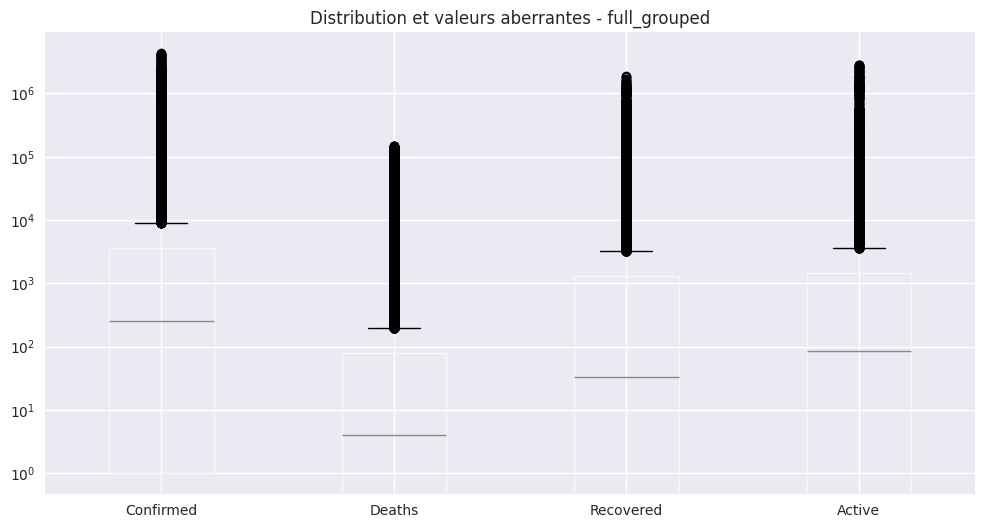


Statistiques descriptives:
          Confirmed         Deaths     Recovered        Active    New cases  \
count  3.515600e+04   35156.000000  3.515600e+04  3.515600e+04  35156.00000   
mean   2.356663e+04    1234.068239  1.104813e+04  1.128443e+04    469.36375   
std    1.499818e+05    7437.238354  6.454640e+04  8.997149e+04   3005.86754   
min    0.000000e+00       0.000000  0.000000e+00 -2.000000e+00      0.00000   
25%    1.000000e+00       0.000000  0.000000e+00  0.000000e+00      0.00000   
50%    2.500000e+02       4.000000  3.300000e+01  8.500000e+01      2.00000   
75%    3.640250e+03      78.250000  1.286250e+03  1.454000e+03     75.00000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  77255.00000   

         New deaths  New recovered  Mortality_Rate  Recovery_Rate  
count  35156.000000   35156.000000    27138.000000   27138.000000  
mean      18.603339     269.315593        3.190756      41.374177  
std      115.706351    2068.063852        4.551847      

<Figure size 1500x800 with 0 Axes>

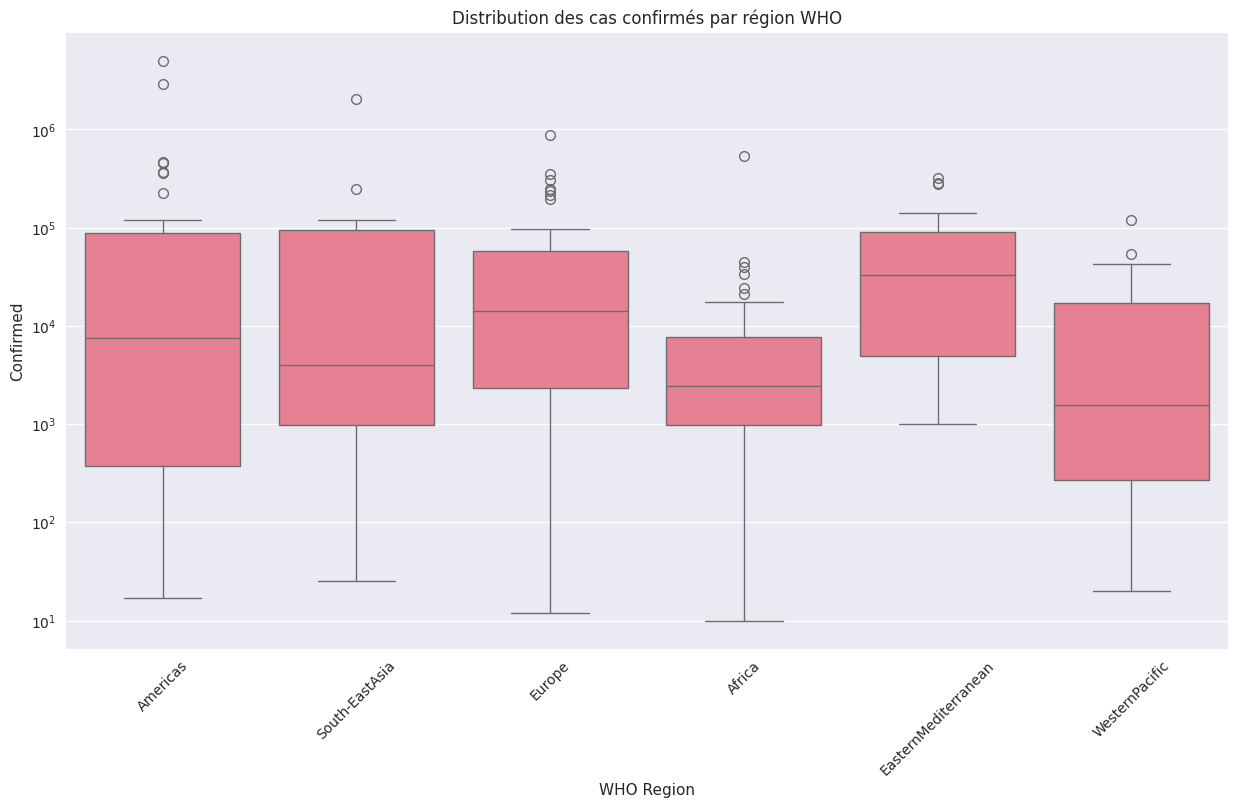

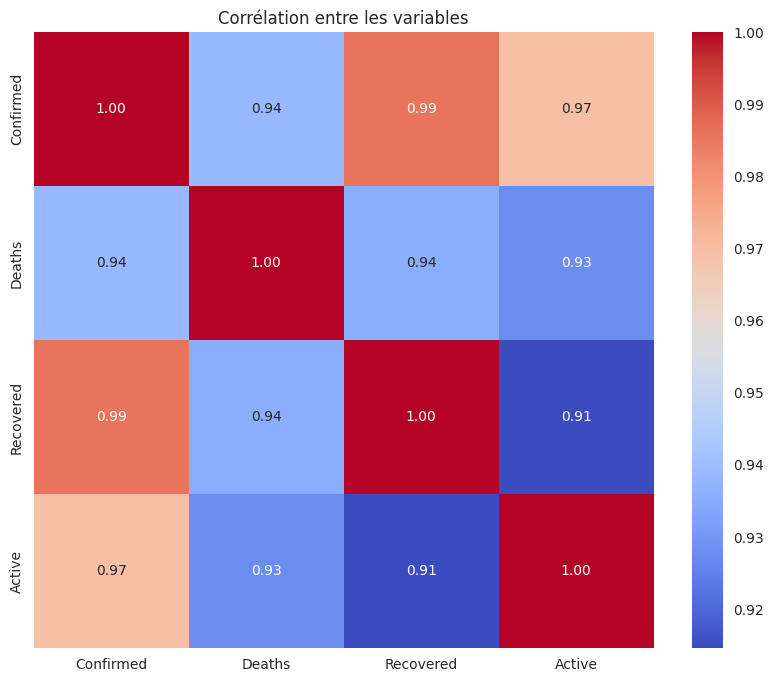

Analyse des ratios...


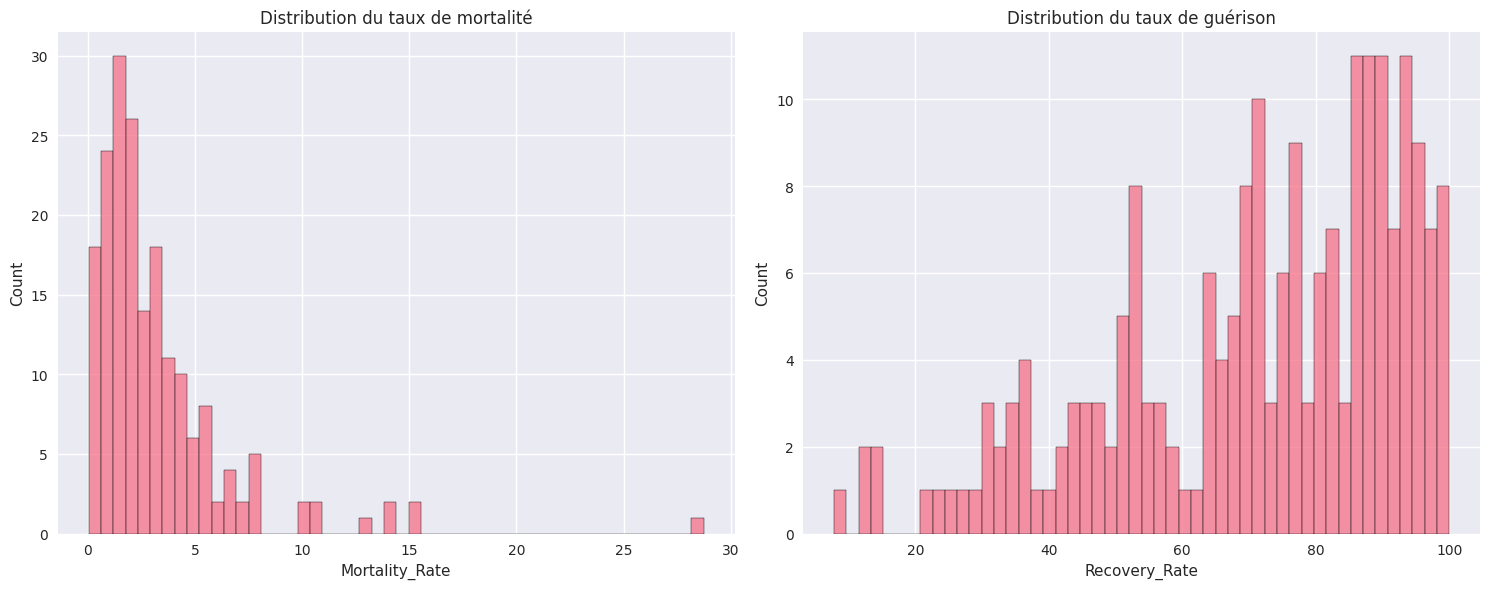

Analyse des valeurs aberrantes...


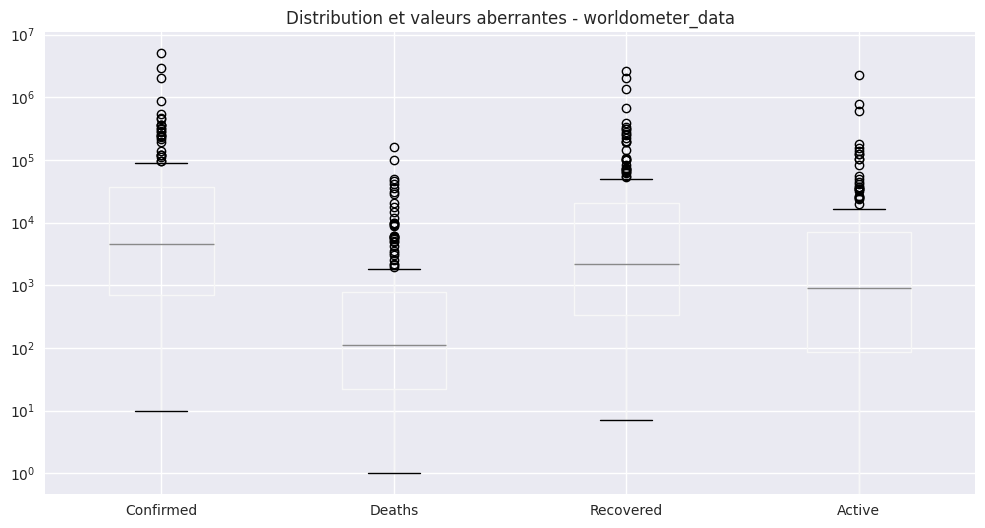


Statistiques descriptives:
         Population     Confirmed     NewCases         Deaths   NewDeaths  \
count  2.080000e+02  2.090000e+02     4.000000     188.000000    3.000000   
mean   3.041549e+07  9.171850e+04  1980.500000    3792.590426  300.000000   
std    1.047661e+08  4.325867e+05  3129.611424   15487.184877  451.199512   
min    8.010000e+02  1.000000e+01    20.000000       1.000000    1.000000   
25%    9.663140e+05  7.120000e+02    27.500000      22.000000   40.500000   
50%    7.041972e+06  4.491000e+03   656.000000     113.000000   80.000000   
75%    2.575614e+07  3.689600e+04  2609.000000     786.000000  449.500000   
max    1.381345e+09  5.032179e+06  6590.000000  162804.000000  819.000000   

          Recovered  NewRecovered        Active  Serious,Critical  \
count  2.050000e+02      3.000000  2.050000e+02        122.000000   
mean   5.887898e+04   1706.000000  2.766433e+04        534.393443   
std    2.566984e+05   2154.779803  1.746327e+05       2047.518613   
mi

In [28]:
# Analyse détaillée pour chaque DataFrame
for df_name, df in dataframes.items():
    print(f"\n=== Analyse détaillée du DataFrame {df_name} ===")
    
    # Vérifier les colonnes nécessaires avant l'analyse
    required_cols = {'Confirmed', 'Deaths', 'Recovered', 'Active', 'WHO Region', 'Date'}
    available_cols = set(df.columns)
    
    # Adapter les noms de colonnes si nécessaire
    col_mapping = {
        'Cases': 'Confirmed',
        'total_confirmed': 'Confirmed',
        'TotalCases': 'Confirmed',
        'cumulative_total_cases': 'Confirmed',
        'total_deaths': 'Deaths',
        'TotalDeaths': 'Deaths',
        'cumulative_total_deaths': 'Deaths',
        'total_recovered': 'Recovered',
        'TotalRecovered': 'Recovered',
        'active_cases': 'Active',
        'ActiveCases': 'Active'
    }
    
    # Créer une copie temporaire du DataFrame avec les colonnes renommées
    temp_df = df.copy()
    temp_df = temp_df.rename(columns=col_mapping)
    
    try:
        if 'Date' in temp_df.columns and set(['Confirmed', 'Deaths', 'Recovered', 'Active']).issubset(temp_df.columns):
            print("Analyse temporelle...")
            analyze_time_series(temp_df)
        
        if set(['Confirmed', 'Deaths', 'Recovered', 'Active']).issubset(temp_df.columns):
            print("Analyse des distributions...")
            analyze_distributions(temp_df)
            
            print("Analyse des ratios...")
            analyze_ratios(temp_df)
            
            print("Analyse des valeurs aberrantes...")
            plt.figure(figsize=(12, 6))
            temp_df.boxplot(column=['Confirmed', 'Deaths', 'Recovered', 'Active'])
            plt.title(f'Distribution et valeurs aberrantes - {df_name}')
            plt.yscale('log')
            plt.show()
    except Exception as e:
        print(f"Impossible d'effectuer certaines analyses pour {df_name}: {str(e)}")
        print("Colonnes disponibles:", temp_df.columns.tolist())

    # Statistiques descriptives
    print("\nStatistiques descriptives:")
    numeric_cols = temp_df.select_dtypes(include=[np.number]).columns
    print(temp_df[numeric_cols].describe())
    
    # Identification des valeurs aberrantes
    print("\nIdentification des valeurs aberrantes:")
    for col in numeric_cols:
        Q1 = temp_df[col].quantile(0.25)
        Q3 = temp_df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = temp_df[(temp_df[col] < (Q1 - 1.5 * IQR)) | (temp_df[col] > (Q3 + 1.5 * IQR))][col]
        if not outliers.empty:
            print(f"\nValeurs aberrantes pour {col}:")
            print(f"Nombre de valeurs aberrantes: {len(outliers)}")
            print(f"Exemples de valeurs aberrantes: {outliers.head()}")
            
    print("\n" + "="*50 + "\n")

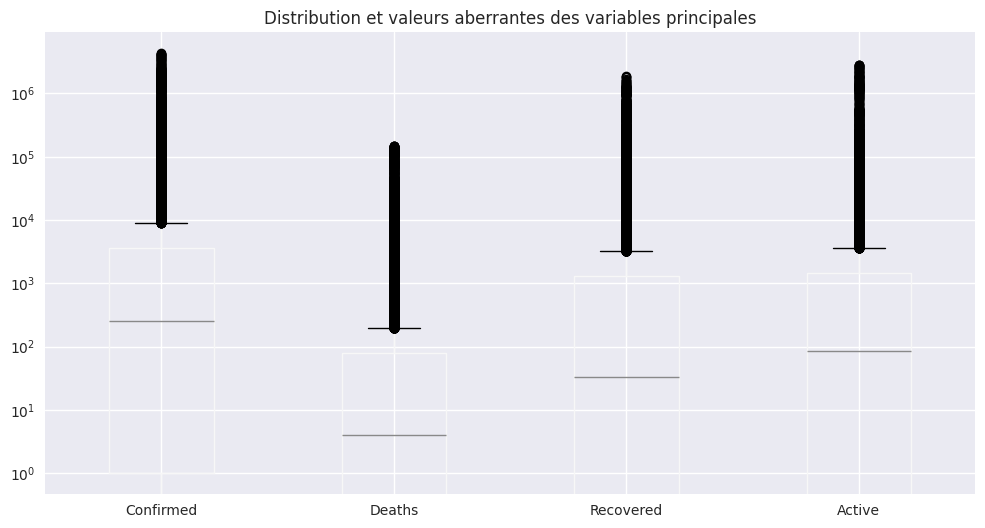

In [21]:
# Analyse des valeurs aberrantes globale
plt.figure(figsize=(12, 6))
full_grouped.boxplot(column=['Confirmed', 'Deaths', 'Recovered', 'Active'])
plt.title('Distribution et valeurs aberrantes des variables principales')
plt.yscale('log')
plt.show()

Suite du projet : 

1. Transformation des données NaN en 0.
2. Fusionné les colonnes similaires.
3. Supprimer les colonnes non necessaire dans la base de donnée.
4. Fusionné les dataframes afin d'en créer un seul.
5. Exportation de ce dataframe et intégration dans la bdd.

In [67]:
# 2. Amélioration de la fonction de standardisation des noms de pays
def standardize_country_names(df):
    # Dictionnaire existant enrichi
    country_mapping = {
        'USA': 'United States',
        'US': 'United States',
        'United States of America': 'United States',
        'UK': 'United Kingdom',
        'Korea, South': 'South Korea',
        'Korea, North': 'North Korea',
        'China, Hong Kong SAR': 'Hong Kong',
        'Taiwan*': 'Taiwan',
        'Burma': 'Myanmar',
        'Congo (Brazzaville)': 'Republic of the Congo',
        'Congo (Kinshasa)': 'Democratic Republic of the Congo',
        'Czechia': 'Czech Republic',
        'Eswatini': 'Swaziland',
        "Cote d'Ivoire": 'Ivory Coast',
        'Iran, Islamic Republic of': 'Iran'
    }
    
    # Application du mapping avec gestion d'erreur
    try:
        if 'Country' in df.columns:
            df['Country'] = df['Country'].replace(country_mapping)
        elif 'Country/Region' in df.columns:
            df['Country/Region'] = df['Country/Region'].replace(country_mapping)
    except Exception as e:
        print(f"Erreur lors de la standardisation des noms de pays: {e}")
    
    return df

# 3. Amélioration de la fonction de détection du format de date
def detect_and_standardize_date_format(dates_series):
    sample_date = dates_series.iloc[0]
    formats_to_try = {
        '%Y-%m-%d': r'^\d{4}-\d{2}-\d{2}$',
        '%d-%m-%Y': r'^\d{2}-\d{2}-\d{4}$',
        '%Y/%m/%d': r'^\d{4}/\d{2}/\d{2}$',
        '%d/%m/%Y': r'^\d{2}/\d{2}/\d{4}$',
        '%m/%d/%Y': r'^\d{2}/\d{2}/\d{4}$'
    }
    
    for date_format, regex in formats_to_try.items():
        try:
            dates_series = pd.to_datetime(dates_series, format=date_format)
            return dates_series
        except:
            continue
            
    # Si aucun format ne correspond, utiliser le parser par défaut
    return pd.to_datetime(dates_series)

# 4. Amélioration de la fonction d'agrégation mensuelle
def aggregate_monthly_data(df):
    if 'Date' not in df.columns:
        return df
    
    # Standardisation de la date
    df['Date'] = detect_and_standardize_date_format(df['Date'])
    
    # Création de la colonne année-mois
    df['YearMonth'] = df['Date'].dt.strftime('%Y-%m')
    
    # Dictionnaire d'agrégation amélioré
    agg_dict = {
        'Confirmed': 'max',  # Prendre le maximum du mois
        'Deaths': 'max',
        'Recovered': 'max',
        'Active': 'max',
        'Population': 'first',
        'WHO Region': 'first'
    }
    
    # Ajout des colonnes si elles existent
    if 'Cases_per_1M' in df.columns:
        agg_dict['Cases_per_1M'] = 'max'
    if 'Deaths_per_1M' in df.columns:
        agg_dict['Deaths_per_1M'] = 'max'
    
    # Groupement avec gestion d'erreur
    try:
        monthly_df = df.groupby(['Country/Region', 'YearMonth']).agg(agg_dict).reset_index()
        monthly_df['Date'] = pd.to_datetime(monthly_df['YearMonth'] + '-01')
        monthly_df = monthly_df.drop('YearMonth', axis=1)
    except Exception as e:
        print(f"Erreur lors de l'agrégation mensuelle: {e}")
        return df
        
    return monthly_df

# 5. Nouvelle fonction de validation des données
def validate_data(df):
    """Valide et corrige les données incohérentes"""
    # Correction des valeurs négatives
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col] = df[col].clip(lower=0)
    
    # Validation de la cohérence des cas
    df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
    df['Active'] = df['Active'].clip(lower=0)
    
    # Calcul et validation des taux
    df['Mortality_Rate'] = (df['Deaths'] / df['Confirmed'] * 100).clip(0, 15)
    df['Recovery_Rate'] = (df['Recovered'] / df['Confirmed'] * 100).clip(0, 100)
    
    return df

In [68]:
def merge_all_dataframes():
    # Dictionnaire de mapping original
    column_mapping = {
        'Country/Region': 'Country',
        'Country_Region': 'Country',
        'country': 'Country',
        'cumulative_total_deaths': 'Deaths',
        'total_deaths': 'Deaths',
        'TotalDeaths': 'Deaths',
        'total_recovered': 'Recovered',
        'TotalRecovered': 'Recovered',
        'Confirmed': 'Cases',
        'cumulative_total_cases': 'Cases',
        'total_confirmed': 'Cases',
        'TotalCases': 'Cases',
        'active_cases': 'Active',
        'ActiveCases': 'Active',
        'date': 'Date',
        'population': 'Population',
    }
    
    dataframes = []
    
    print("Étape 1: Collecte et nettoyage des DataFrames")
    for file in csv_files:
        df_name = file.replace('.csv', '')
        current_df = eval(df_name)
        
        # Renommer les colonnes
        current_df = current_df.rename(columns=column_mapping)
        
        # Nouvelles validations ajoutées
        numeric_cols = current_df.select_dtypes(include=['float64', 'int64']).columns
        current_df[numeric_cols] = current_df[numeric_cols].clip(lower=0)  # Pas de valeurs négatives
        current_df[numeric_cols] = current_df[numeric_cols].fillna(0)  # Remplacer NaN par 0
        
        # Standardiser les noms des pays
        current_df = standardize_country_names(current_df)
        
        # Agréger par mois si nécessaire
        if 'Date' in current_df.columns:
            # Standardiser le format de date
            current_df['Date'] = pd.to_datetime(current_df['Date'])
            current_df = aggregate_monthly_data(current_df)
        
        # Calcul et validation des taux si possible
        if all(col in current_df.columns for col in ['Deaths', 'Cases']):
            current_df['Mortality_Rate'] = (current_df['Deaths'] / current_df['Cases'] * 100).clip(0, 15)
        if all(col in current_df.columns for col in ['Recovered', 'Cases']):
            current_df['Recovery_Rate'] = (current_df['Recovered'] / current_df['Cases'] * 100).clip(0, 100)
        
        # Ajouter uniquement les colonnes essentielles
        essential_cols = ['Country', 'Date', 'Population', 'Cases', 'Active', 'Recovered', 'Deaths']
        cols_to_use = [col for col in essential_cols if col in current_df.columns]
        
        if 'Country' in cols_to_use:
            dataframes.append(current_df[cols_to_use].copy())
            print(f"DataFrame {df_name} ajouté avec les colonnes: {cols_to_use}")
        else:
            print(f"DataFrame {df_name} ignoré (pas de colonne Country)")
    
    if not dataframes:
        raise Exception("Aucun DataFrame valide à fusionner")
    
    print("\nÉtape 2: Fusion progressive des DataFrames")
    merged_data = dataframes[0]
    
    for i, df in enumerate(dataframes[1:], 1):
        print(f"Fusion du DataFrame {i+1}")
        merge_cols = ['Country']
        if 'Date' in df.columns and 'Date' in merged_data.columns:
            merge_cols.append('Date')
            
        merged_data = pd.merge(
            merged_data,
            df,
            on=merge_cols,
            how='outer',
            suffixes=('', f'_{i}')
        )
        print(f"Taille actuelle du DataFrame fusionné: {merged_data.shape}")
        
    print("\nÉtape 3: Nettoyage des colonnes en double")
    # Identifier et traiter les colonnes en double
    duplicate_cols = {}
    for col in merged_data.columns:
        if '_' in col:
            base_col = col.split('_')[0]
            if base_col not in duplicate_cols:
                duplicate_cols[base_col] = []
            duplicate_cols[base_col].append(col)
            
    # Combiner les colonnes en double
    for base_col, dup_cols in duplicate_cols.items():
        if base_col in merged_data.columns:
            cols_to_combine = [base_col] + dup_cols
            merged_data[base_col] = merged_data[cols_to_combine].mean(axis=1)
            merged_data = merged_data.drop(dup_cols, axis=1)
            
    print("\nÉtape 4: Nettoyage final et optimisation")
    
    # Supprimer les lignes où la date est null (si la colonne Date existe)
    if 'Date' in merged_data.columns:
        merged_data = merged_data.dropna(subset=['Date'])
        print(f"Nombre de lignes supprimées avec date manquante: {len(merged_data[merged_data['Date'].isna()])}")
    
    # Remplacer les NaN par des 0 seulement pour les colonnes numériques
    numeric_cols = merged_data.select_dtypes(include=['float64', 'int64']).columns
    merged_data[numeric_cols] = merged_data[numeric_cols].fillna(0)
    
    # Supprimer les doublons éventuels
    if 'Date' in merged_data.columns:
        merged_data = merged_data.drop_duplicates(subset=['Country', 'Date'])
    else:
        merged_data = merged_data.drop_duplicates(subset=['Country'])
    
    # Convertir les colonnes numériques en entiers
    numeric_columns = ['Population', 'Cases', 'Active', 'Recovered', 'Deaths']
    for col in numeric_columns:
        if col in merged_data.columns:
            merged_data[col] = merged_data[col].astype(int)
    
    # Vérification finale de la cohérence des données
    merged_data['Active'] = merged_data['Cases'] - merged_data['Deaths'] - merged_data['Recovered']
    merged_data['Active'] = merged_data['Active'].clip(lower=0)  # Pas de valeurs négatives
    
    # Réorganiser les colonnes dans l'ordre exact demandé
    desired_order = ['Country', 'Date', 'Population', 'Cases', 'Active', 'Recovered', 'Deaths']
    # Ajouter des colonnes manquantes avec des 0 si nécessaire
    for col in desired_order:
        if col not in merged_data.columns and col != 'Date':
            merged_data[col] = 0
    merged_data = merged_data[desired_order]
    
    print(f"Taille finale du DataFrame après nettoyage: {merged_data.shape}")
    
    try:
        # Exporter le DataFrame en CSV
        merged_data.to_csv('merged_data.csv', index=False)
        print("Les données ont été exportées dans 'merged_data.csv'")
    except Exception as e:
        print(f"Erreur lors de l'export en CSV: {str(e)}")
    
    return merged_data